# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file
df = pd.read_parquet('./trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [16]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [18]:
#from google.colab import drive
#drive.mount('/content/drive')

In [20]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('./trip_records')

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() 
             if f.endswith('.parquet') and not f.startswith('.')]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()
        
        # Extract date and hour from pickup datetime
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # Get unique dates in current month's data
        unique_dates = monthly_data['date'].unique()
        
        # Loop through dates and then loop through every hour of each date
        for date in unique_dates:
            date_data = monthly_data[monthly_data['date'] == date]
            unique_hours = date_data['hour'].unique()
            
            # Iterate through each hour of the selected date
            for hour in unique_hours:
                # Sample 5% of the hourly data randomly
                hour_data = date_data[date_data['hour'] == hour]
                sample = hour_data.sample(frac=0.05, random_state=42)
                
                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample])
                
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [23]:
# Store the df in csv/parquet
df.to_parquet('nyc_yellow_taxi_2023_sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
import os
os.getcwd()
#os.chdir('..')
os.chdir('./trip_records')
df1 = pd.read_parquet('nyc_yellow_taxi_2023_sampled.parquet')

In [13]:
df1.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1788            2  2023-12-01 00:27:51   2023-12-01 00:50:12              1.0   
3196699         2  2023-12-01 00:38:48   2023-12-01 01:01:55              NaN   
1408            2  2023-12-01 00:06:19   2023-12-01 00:16:57              1.0   
3196663         2  2023-12-01 00:00:50   2023-12-01 00:14:37              NaN   
3613            2  2023-12-01 00:16:07   2023-12-01 00:19:17              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1788              3.99         1.0                  N           148   
3196699           4.79         NaN               None           231   
1408              1.05         1.0                  N           161   
3196663           2.08         NaN               None           137   
3613              0.40         1.0                  N            68   

         DOLocationID  payment_type  ...  mta_tax  tip_amount  tolls_amount  \
1788               50             1  ...      0.5        5.66           0.0   
3196699            61             0  ...      0.5        3.00           0.0   
1408              161             1  ...      0.5        3.14           0.0   
3196663           144             0  ...      0.5        0.00           0.0   
3613               68             1  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
1788                       1.0         33.96                   2.5   
3196699                    1.0         29.43                   NaN   
1408                       1.0         18.84                   2.5   
3196663                    1.0         21.22                   NaN   
3613                       1.0         10.10                   2.5   

         Airport_fee        date  hour airport_fee  
1788             0.0  2023-12-01     0         NaN  
3196699          NaN  2023-12-01     0         NaN  
1408             0.0  2023-12-01     0         NaN  
3196663          NaN  2023-12-01     0         NaN  
3613             0.0  2023-12-01     0         NaN  

[5 rows x 22 columns]

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991327 entries, 1788 to 3202916
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [19]:
# Fix the index and drop any columns that are not needed
df1 = df1.reset_index(drop=True)
df1.drop(columns=['date', 'hour'])
print(df1.isnull().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            68129
trip_distance                  0
RatecodeID                 68129
store_and_fwd_flag         68129
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       68129
Airport_fee               224033
date                           0
hour                           0
airport_fee              1835423
dtype: int64


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [22]:
# Combine the two airport fee columns
# Combine the columns - use non-null values from either column
df1['airport_fee_combined'] = df1['Airport_fee'].fillna(df1['airport_fee'])

# Fill any remaining NaN with 0 (assuming 0 means no fee)
df1['airport_fee_combined'] = df1['airport_fee_combined'].fillna(0)

# Drop the original columns
df1 = df1.drop(columns=['Airport_fee', 'airport_fee'])

# Rename to standard format
df1 = df1.rename(columns={'airport_fee_combined': 'Airport_fee'})

In [24]:
print(df1.isnull().sum())
print(df1['Airport_fee'].value_counts())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          68129
trip_distance                0
RatecodeID               68129
store_and_fwd_flag       68129
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     68129
date                         0
hour                         0
Airport_fee                  0
dtype: int64
Airport_fee
 0.00    1822421
 1.75     127196
 1.25      41692
-1.75         13
-1.25          4
 1.00          1
Name: count, dtype: int64


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [27]:
# check where values of fare amount are negative
print(len(df1[(df1['fare_amount']<0)]))
print(len(df1[(df1['extra']<0)]))
print(len(df1[(df1['mta_tax']<0)]))
print(len(df1[(df1['tip_amount']<0)]))
print(len(df1[(df1['tolls_amount']<0)]))
print(len(df1[(df1['improvement_surcharge']<0)]))
print(len(df1[(df1['total_amount']<0)]))
print(len(df1[(df1['congestion_surcharge']<0)]))
print(len(df1[(df1['Airport_fee']<0)]))

0
3
82
0
0
87
87
62
17


Did you notice something different in the `RatecodeID` column for above records?

In [30]:
# Analyse RatecodeID for the negative fare amounts
df1[df1['fare_amount']<0].RatecodeID.value_counts()

# In my sampled dataset records with negative fare_amount are not present, instead I can see invalid records with RatecodeID = 99.0
df1[df1['RatecodeID']==99.0]

# Let's drop this 10 K records
df1 = df1[~(df1['RatecodeID']==99.0)]

In [32]:
df1['RatecodeID'].value_counts()

RatecodeID
1.0    1815905
2.0      75176
5.0      10798
3.0       6419
4.0       3897
6.0          3
Name: count, dtype: int64

In [34]:
# Find which columns have negative values

print(len(df1[(df1['fare_amount']<0)]))
print(len(df1[(df1['extra']<0)]))
print(len(df1[(df1['mta_tax']<0)]))
print(len(df1[(df1['tip_amount']<0)]))
print(len(df1[(df1['tolls_amount']<0)]))
print(len(df1[(df1['improvement_surcharge']<0)]))
print(len(df1[(df1['total_amount']<0)]))
print(len(df1[(df1['congestion_surcharge']<0)]))
print(len(df1[(df1['Airport_fee']<0)]))

# as seen above extra, mta_tax, improvement_surcharge, total_amount, congestion_surcharge and Airport_fee monetory columns has negative
# Values in my sampled dataset.


0
3
82
0
0
87
87
62
17


In [36]:
# fix these negative values

columns_to_fix = ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee']
df1[columns_to_fix] = df1[columns_to_fix].abs()

# Find which columns have negative values

print(len(df1[(df1['fare_amount']<0)]))
print(len(df1[(df1['extra']<0)]))
print(len(df1[(df1['mta_tax']<0)]))
print(len(df1[(df1['tip_amount']<0)]))
print(len(df1[(df1['tolls_amount']<0)]))
print(len(df1[(df1['improvement_surcharge']<0)]))
print(len(df1[(df1['total_amount']<0)]))
print(len(df1[(df1['congestion_surcharge']<0)]))
print(len(df1[(df1['Airport_fee']<0)]))

# Now all Monetory columns has positive values

0
0
0
0
0
0
0
0
0


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [40]:
# Find the proportion of missing values in each column

missing_proportions = df1.isna().mean().round(4) * 100

print("Proportion of missing values by column (%):")
print(missing_proportions.sort_values(ascending=False))


Proportion of missing values by column (%):
passenger_count          3.44
RatecodeID               3.44
store_and_fwd_flag       3.44
congestion_surcharge     3.44
VendorID                 0.00
mta_tax                  0.00
hour                     0.00
date                     0.00
total_amount             0.00
improvement_surcharge    0.00
tolls_amount             0.00
tip_amount               0.00
fare_amount              0.00
extra                    0.00
tpep_pickup_datetime     0.00
payment_type             0.00
DOLocationID             0.00
PULocationID             0.00
trip_distance            0.00
tpep_dropoff_datetime    0.00
Airport_fee              0.00
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [43]:
# Display the rows with null values
print(df1.isnull().sum())

#Check if passenger_count, congestion_surcharge , store_and_fwd_flag and RatecodeID values are null together for records as null value counts exatly matches for them
#df1[(df1['passenger_count'].isnull() == True)&(df1['congestion_surcharge'].isnull() == True)&(df1['RatecodeID'].isnull() == True)&(df1['RatecodeID'].isnull() == True)&(df1['store_and_fwd_flag'].isnull() == True)]

# Impute NaN values in 'passenger_count'
passenger_mode = df1['passenger_count'].mode()[0]
df1['passenger_count'] = df1['passenger_count'].fillna(passenger_mode)

df1['passenger_count'].isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          68129
trip_distance                0
RatecodeID               68129
store_and_fwd_flag       68129
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     68129
date                         0
hour                         0
Airport_fee                  0
dtype: int64


0

Did you find zeroes in passenger_count? Handle these.

In [46]:
# As we need precise 
zero_passenger_mask = df1['passenger_count'] == 0
mode_val = df1['passenger_count'].mode()[0]

df1.loc[zero_passenger_mask, 'passenger_count'] = mode_val

# Check 0s in passenger_count count post imputation
df1[df1['passenger_count'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [49]:
# Fix missing values in 'RatecodeID'
print(f'Null values in RatecodeID before imputation - {df1['RatecodeID'].isna().sum()}')

RatecodeID_mode = df1['RatecodeID'].mode()[0]
print(f'RatecodeID_mode is - {RatecodeID_mode}')

df1['RatecodeID'] = df1['RatecodeID'].fillna(RatecodeID_mode)

print(f'Null values in RatecodeID post imputation - {df1['RatecodeID'].isna().sum()}')

Null values in RatecodeID before imputation - 68129
RatecodeID_mode is - 1.0
Null values in RatecodeID post imputation - 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [52]:
# handle null values in congestion_surcharge
# Handel data error where only 1 entry shows 0.5 congestion_surcharge
df1.loc[df1['congestion_surcharge'] == 0.5, 'congestion_surcharge'] = 2.5

# Function to compute congestion fees as per trip details and trip timings
def determine_congestion_fee(row):
    if pd.notna(row['congestion_surcharge']):
        return row['congestion_surcharge']
       
    # Explicit exemptions (no surcharge)
    if ((row['RatecodeID'] in [2, 3, 4]) or               # Airports (JFK/Newark) or Nassau/Westchester
        (row['PULocationID'] not in range(1, 264)) or    # Outside Manhattan CBD zones
        (row['tpep_pickup_datetime'].hour < 6) or       # Overnight (12AM-6AM)
        (row['tpep_pickup_datetime'].hour >= 20)):      # Evening (8PM-12AM)
        return 0.0
   
    # Special cases
    if row['RatecodeID'] in [5, 6]:
        return 0.0  # Also exempted in case of negotiated fares and group rides
    # Default case: Standard rate (RateCodeID=1) in Manhattan 6AM-8PM
    return 2.5

df1['congestion_surcharge'] = df1.apply(determine_congestion_fee, axis=1)


In [53]:
print('Post Imputation value counts as below - ')
display(df1['congestion_surcharge'].value_counts())
print(f'Post Imputation NaN values present in dataframe for congestion_surcharge - {df1['congestion_surcharge'].isna().sum()}')

Post Imputation value counts as below - 


congestion_surcharge
2.5    1819887
0.0     160440
Name: count, dtype: int64

Post Imputation NaN values present in dataframe for congestion_surcharge - 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [57]:
# Handle any remaining missing values
store_and_fwd_flag_mode = df1['store_and_fwd_flag'].mode()[0]
print("store_and_fwd_flag_mode most occured value is - "+ store_and_fwd_flag_mode)
df1['store_and_fwd_flag'] = df1['store_and_fwd_flag'].fillna(store_and_fwd_flag_mode)

df1.isnull().sum()

store_and_fwd_flag_mode most occured value is - N


VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
date                     0
hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [61]:
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
df1[(df1['trip_distance']==0) & (df1['fare_amount'] > 300)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
41492           2  2023-12-07 23:39:43   2023-12-07 23:39:59              1.0   
146366          2  2023-12-24 14:01:07   2023-12-24 14:01:44              1.0   
197021          2  2023-04-05 21:16:43   2023-04-05 21:25:57              1.0   
393980          1  2023-05-15 13:28:42   2023-05-15 13:29:45              1.0   
438075          2  2023-05-19 21:04:06   2023-05-19 21:04:22              2.0   
456791          2  2023-05-22 19:38:15   2023-05-22 19:38:38              1.0   
463601          2  2023-05-24 02:11:35   2023-05-24 02:11:57              1.0   
547126          1  2023-02-09 07:37:30   2023-02-09 07:39:13              1.0   
794653          2  2023-11-26 16:04:06   2023-11-26 16:04:12              1.0   
857417          2  2023-10-09 21:36:01   2023-10-09 21:39:15              1.0   
874014          1  2023-10-13 18:22:04   2023-10-13 18:22:38              1.0   
919363          2  2023-10-20 01:11:27   2023-10-20 01:13:03              1.0   
992047          2  2023-08-01 22:06:03   2023-08-01 22:06:41              2.0   
1046649         2  2023-08-13 18:44:08   2023-08-13 18:44:22              4.0   
1078962         2  2023-08-20 21:39:04   2023-08-20 21:39:12              2.0   
1078971         2  2023-08-20 21:56:48   2023-08-20 21:56:59              2.0   
1099244         2  2023-08-25 16:13:28   2023-08-25 16:13:42              2.0   
1109161         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1165620         1  2023-01-09 16:17:32   2023-01-09 16:20:41              1.0   
1216584         2  2023-01-19 20:58:47   2023-01-19 20:58:51              4.0   
1342580         2  2023-07-15 16:08:15   2023-07-15 16:08:35              2.0   
1403490         2  2023-07-27 19:30:15   2023-07-27 19:30:50              1.0   
1431061         2  2023-09-02 22:01:05   2023-09-02 22:01:20              1.0   
1619997         2  2023-08-27 18:46:43   2023-08-27 18:47:01              1.0   
1824824         1  2023-03-31 16:56:04   2023-03-31 16:57:02              1.0   
1869690         1  2023-06-08 04:59:03   2023-06-08 04:59:38              2.0   
1880456         2  2023-06-10 01:58:47   2023-06-10 01:59:16              1.0   
1882671         1  2023-06-10 10:40:51   2023-06-10 10:41:38              1.0   
1917314         2  2023-06-16 17:16:53   2023-06-16 17:17:05              4.0   
1936074         2  2023-06-20 15:38:20   2023-06-20 15:38:30              1.0   
1941172         2  2023-06-21 12:05:21   2023-06-21 12:05:42              1.0   
1958099         1  2023-06-24 19:41:42   2023-06-24 19:43:18              1.0   
1982770         2  2023-06-29 20:56:07   2023-06-29 20:56:15              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
41492              0.0         5.0                  N           265   
146366             0.0         5.0                  N            14   
197021             0.0         5.0                  N           265   
393980             0.0         5.0                  N           145   
438075             0.0         5.0                  N           265   
456791             0.0         5.0                  N           265   
463601             0.0         5.0                  N           265   
547126             0.0         5.0                  N           246   
794653             0.0         5.0                  N           265   
857417             0.0         5.0                  N           100   
874014             0.0         5.0                  N           168   
919363             0.0         5.0                  N           265   
992047             0.0         5.0                  N            39   
1046649            0.0         5.0                  N           265   
1078962            0.0         5.0                  N           132   
1078971            0.0         5.0                  N           185   
1099244            0.0         5.0             

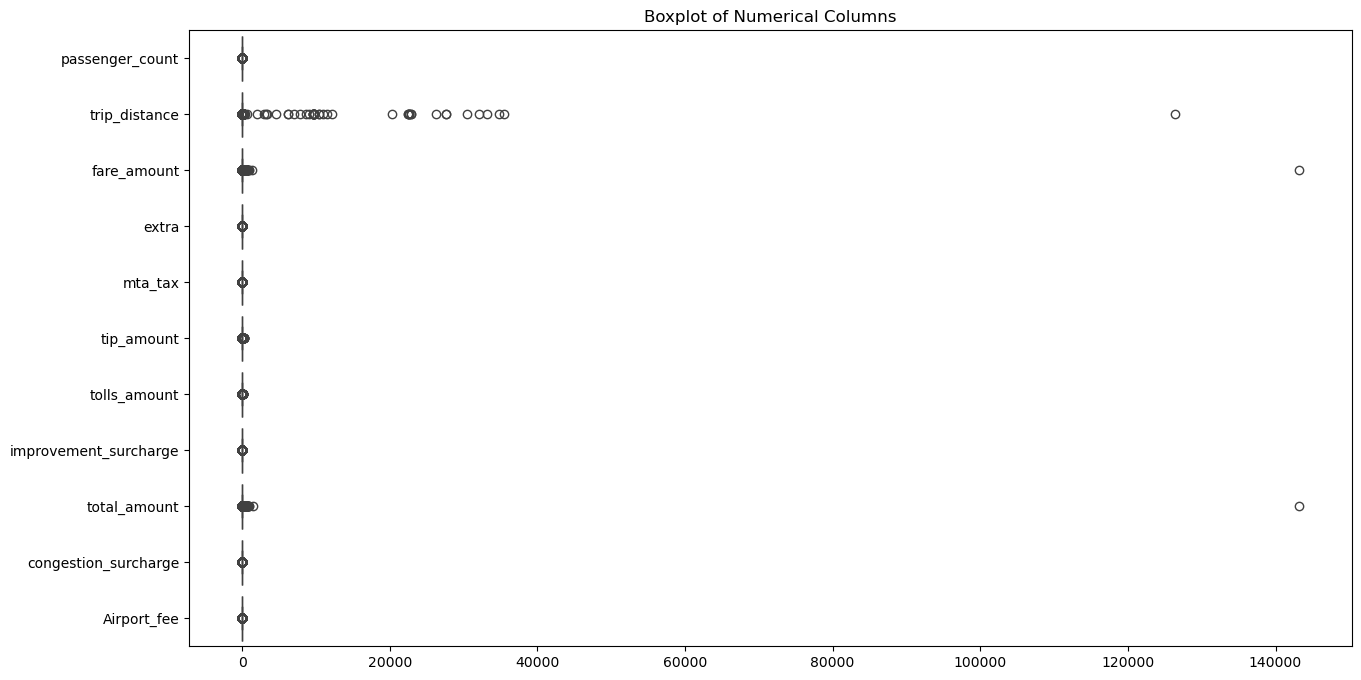

No. of ntries where trip_distance is nearly 0 and fare_amount is more than 300 - 33
No. of trips with trip_distance and fare_amount are 0 but the pickup and dropoff zones are different - 62
No. of trips with trip_distance is more than 250 miles - 45
No. of Entries where payment_type is 0 - 68129
No. of Entries where Pickup and drop timing are same - 707


In [63]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

numerical_cols = [
    'passenger_count', 'trip_distance', 'fare_amount', 
    'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
    'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'Airport_fee'
]

plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_cols], orient='h')
plt.title("Boxplot of Numerical Columns")
plt.show()

# Entries where trip_distance is nearly 0 and fare_amount is more than 300
data = df1[(df1['trip_distance']==0) & (df1['fare_amount'] > 300)]
print("No. of ntries where trip_distance is nearly 0 and fare_amount is more than 300 - "+str(len(data)))

#Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
#(both distance and fare should not be zero for different zones)
data = df1[(df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) & (df1['PULocationID'] != df1['DOLocationID']) ]
print("No. of trips with trip_distance and fare_amount are 0 but the pickup and dropoff zones are different - "+str(len(data)))

#Entries where trip_distance is more than 250 miles.
data = df1[(df1['trip_distance'] > 250)]
print("No. of trips with trip_distance is more than 250 miles - "+str(len(data)))

#Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
data = df1[(df1['payment_type'] == 0)]
print("No. of Entries where payment_type is 0 - "+str(len(data)))

#No. of Entries where Pickup and drop timing are same
data = df1[(df1['tpep_pickup_datetime'] == df1['tpep_dropoff_datetime'])]
print("No. of Entries where Pickup and drop timing are same - "+str(len(data)))


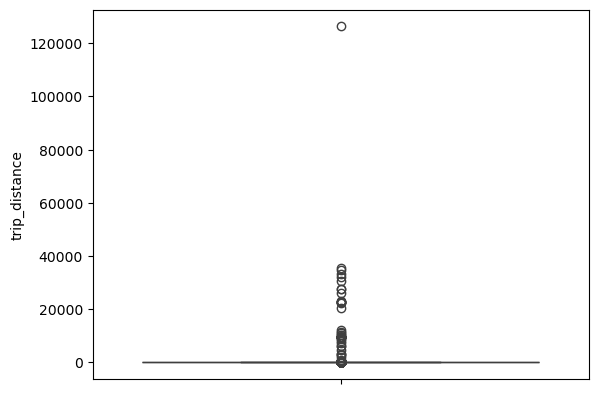

count    1.980327e+06
mean     3.813977e+00
std      1.224454e+02
min      0.000000e+00
25%      1.040000e+00
50%      1.790000e+00
75%      3.390000e+00
max      1.263605e+05
Name: trip_distance, dtype: float64

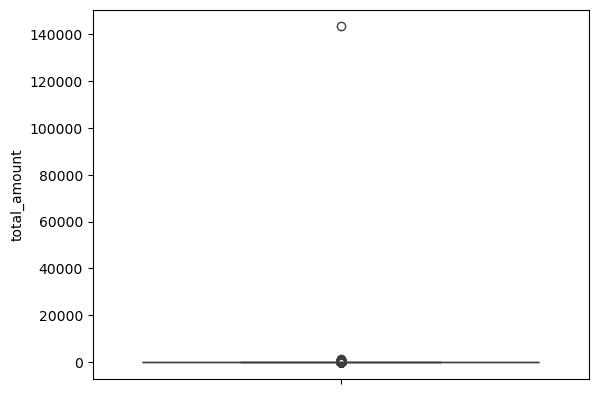

count    1.980327e+06
mean     2.893463e+01
std      1.042438e+02
min      0.000000e+00
25%      1.596000e+01
50%      2.100000e+01
75%      3.072000e+01
max      1.431675e+05
Name: total_amount, dtype: float64

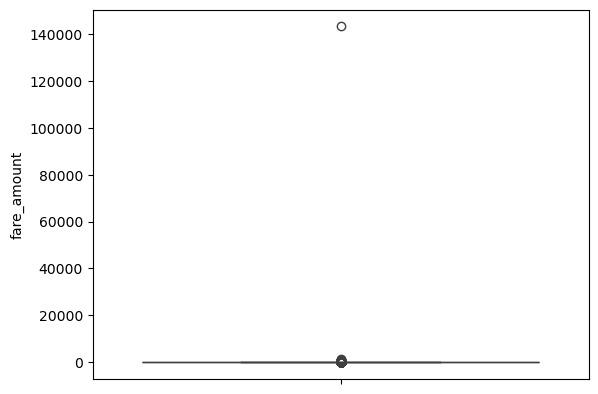

count    1.980327e+06
mean     1.983927e+01
std      1.033400e+02
min      0.000000e+00
25%      9.300000e+00
50%      1.350000e+01
75%      2.190000e+01
max      1.431635e+05
Name: fare_amount, dtype: float64

In [70]:
sns.boxplot(data = df1, y='trip_distance')
plt.show()

display(df1['trip_distance'].describe())

sns.boxplot(data = df1, y='total_amount')
plt.show()

display(df1['total_amount'].describe())

sns.boxplot(data = df1, y='fare_amount')
plt.show()

display(df1['fare_amount'].describe())



tolls_amount
0.00     1821325
6.55       87097
6.94       58727
12.75       2151
14.75       1787
          ...   
24.83          1
14.88          1
3.58           1
4.30           1
6.66           1
Name: count, Length: 708, dtype: int64

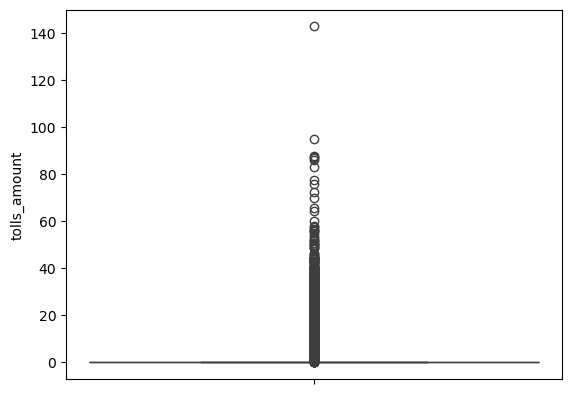

In [71]:
sns.boxplot(data = df1, y='tolls_amount')
plt.plot()

display(df1['tolls_amount'].value_counts())

[]

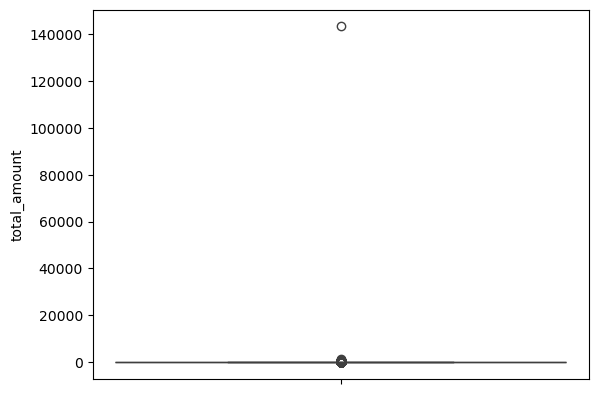

In [72]:
sns.boxplot(data = df1, y='total_amount')
plt.plot()

In [74]:
df1[df1['total_amount']> 20000]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1439867         1  2023-09-05 10:16:13   2023-09-05 10:20:56              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
1439867            0.7         1.0                  N           249   

         DOLocationID  payment_type  ...  extra  mta_tax  tip_amount  \
1439867            90             2  ...    2.5      0.5         0.0   

         tolls_amount  improvement_surcharge  total_amount  \
1439867           0.0                    1.0     143167.45   

         congestion_surcharge        date hour  Airport_fee  
1439867                   2.5  2023-09-05   10          0.0  

[1 rows x 21 columns]

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [82]:
# Continue with outlier handling

# Remove Entries where trip_distance is nearly 0 and fare_amount is more than 300
df1 = df1[df1['fare_amount']< 20000]
df1 = df1[~((df1['trip_distance'] < 10) & (df1['fare_amount']>300))]

# Remove trips with trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
df1 = df1[~((df1['trip_distance'] == 0) & (df1['fare_amount'] == 0) & (df1['PULocationID'] != df1['DOLocationID']))]

# Remove Entries where trip_distance is more than 250 miles.
df1 = df1[~(df1['trip_distance'] > 250)]

# Remove Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df1 = df1[~(df1['payment_type'] == 0)]

# Remove Entries where Pickup and drop timing are same
df1 = df1[~((df1['tpep_pickup_datetime'] == df1['tpep_dropoff_datetime']))]

# Remove Entries where Extras > 6
df1 = df1[df1['extra']<6]

# Remove ntries where tolls_amount > 10
df1 = df1[df1['tolls_amount']<10]

# Remove Entries where total_amount > 500
df1 = df1[df1['total_amount']< 500]

# Remove the Entries where fare_amount > 100 and and trip distance is less than 0.5 miles
df1 = df1[~((df1['fare_amount'] > 100) & (df1['trip_distance']<5))]

In [83]:
df1[((df1['fare_amount'] > 500))]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, date, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [86]:
# remove passenger_count > 6
df1 = df1[~(df1['passenger_count']>6)]


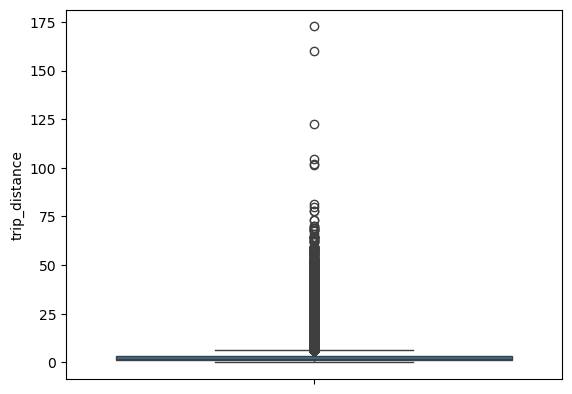

count    1.848659e+06
mean     3.164432e+00
std      4.221290e+00
min      0.000000e+00
25%      1.030000e+00
50%      1.710000e+00
75%      3.100000e+00
max      1.727100e+02
Name: trip_distance, dtype: float64

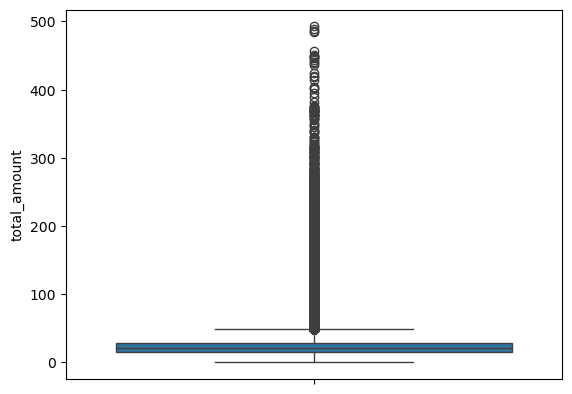

count    1.848659e+06
mean     2.715946e+01
std      2.029794e+01
min      0.000000e+00
25%      1.570000e+01
50%      2.058000e+01
75%      2.905000e+01
max      4.927000e+02
Name: total_amount, dtype: float64

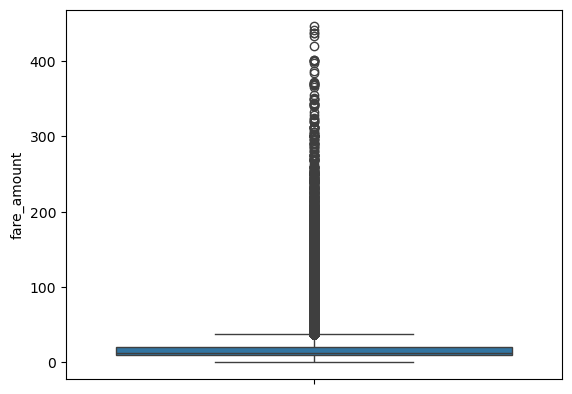

count    1.848659e+06
mean     1.854545e+01
std      1.645914e+01
min      0.000000e+00
25%      9.300000e+00
50%      1.280000e+01
75%      2.050000e+01
max      4.461000e+02
Name: fare_amount, dtype: float64

In [88]:
# Check outliers post cleaning
sns.boxplot(data = df1, y='trip_distance')
plt.show()

display(df1['trip_distance'].describe())

sns.boxplot(data = df1, y='total_amount')
plt.show()

display(df1['total_amount'].describe())

sns.boxplot(data = df1, y='fare_amount')
plt.show()

display(df1['fare_amount'].describe())

In [90]:
# Do any columns need standardising?
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1848659 entries, 0 to 1991326
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                   obje

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [93]:
df1.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:Categorical
* `tpep_pickup_datetime`:Numerical
* `tpep_dropoff_datetime`:Numerical
* `passenger_count`:Categorical as well as Discrete Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Numerical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? 
Ans - These are treated as Numerical parameters but few colums like congestion_surcharge, airport_fee can be treated as categorial parameters as well if labeled.


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

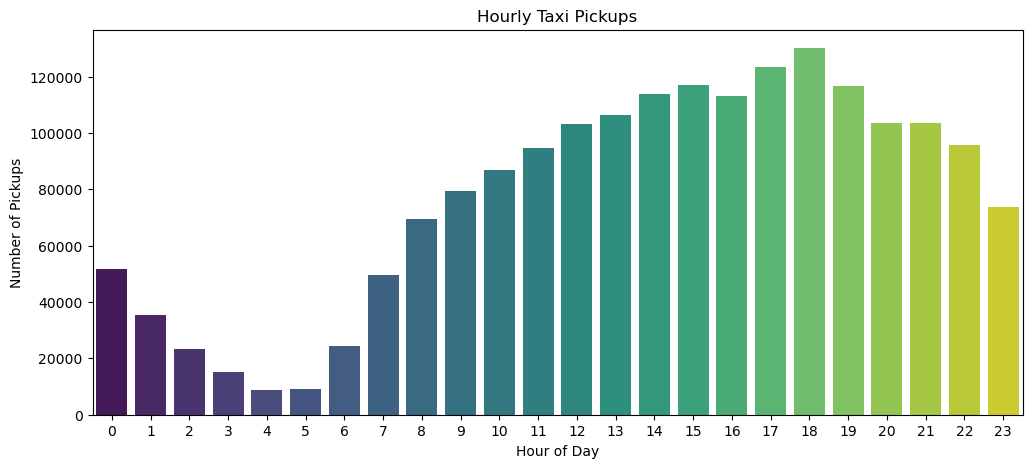

In [99]:
# Find and show the hourly trends in taxi pickups

# Extract time features
df1["pickup_hour"] = df1["tpep_pickup_datetime"].dt.hour

# Find and show the hourly trends in taxi pickups
plt.figure(figsize=(12, 5))
sns.countplot(data=df1, x="pickup_hour", palette="viridis")
plt.title("Hourly Taxi Pickups")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.show()



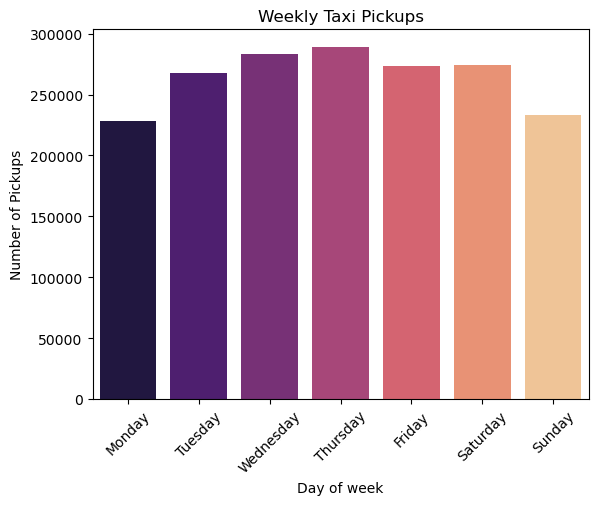

In [101]:
# Find and show the daily trends in taxi pickups (days of the week)
df1["pickup_day"] = df1["tpep_pickup_datetime"].dt.day_name()

week_day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']

sns.countplot(data=df1, x="pickup_day", order=week_day_order, palette="magma")
plt.title("Weekly Taxi Pickups")
plt.xlabel("Day of week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

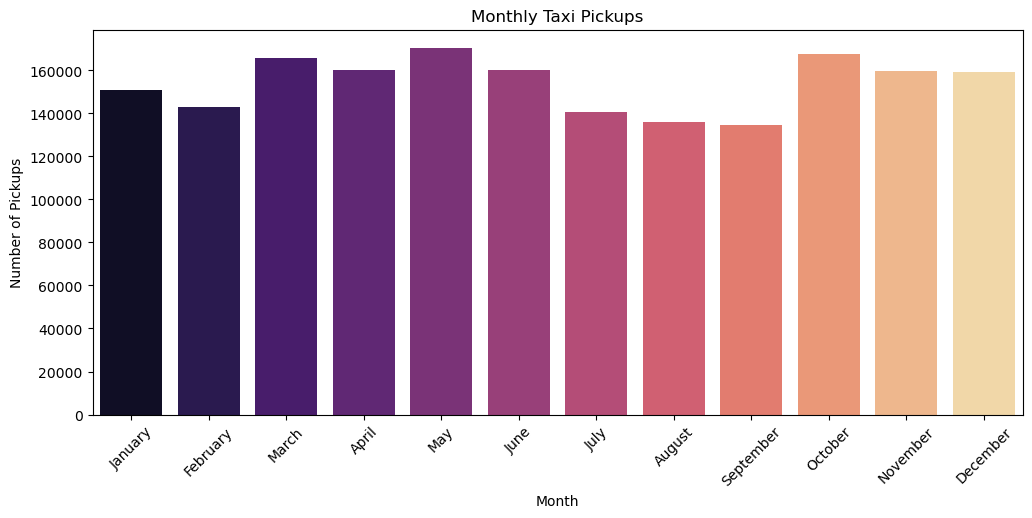

In [102]:
# Show the monthly trends in pickups
df1["pickup_month"] = df1["tpep_pickup_datetime"].dt.month_name()
# Show the monthly trends in pickups
plt.figure(figsize=(12, 5))
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sns.countplot(data=df1, x="pickup_month", order=month_order, palette="magma")
plt.title("Monthly Taxi Pickups")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [107]:
# Analyse the above parameters

financial_cols = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

## Analyse the above parameters
for col in financial_cols:
    print(f"{col} - Zero values: {(df1[col] == 0).sum()} | Negative values: {(df1[col] < 0).sum()}")

fare_amount - Zero values: 567 | Negative values: 0
tip_amount - Zero values: 406173 | Negative values: 0
total_amount - Zero values: 252 | Negative values: 0
trip_distance - Zero values: 21224 | Negative values: 0


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [111]:
# Create a df with non zero entries for the selected parameters.
df_cleaned = df1[
    (df1["fare_amount"] > 0) &
    (df1["tip_amount"] >= 0) &
    (df1["total_amount"] > 0)]

df_cleaned = df_cleaned[~((df_cleaned['trip_distance'] == 0) & (df_cleaned['PULocationID'] == df_cleaned['DOLocationID']))]
df_cleaned = df_cleaned[df_cleaned['trip_distance'] > 0]

In [113]:
df_cleaned.info()
## Analyse the above parameters
for col in financial_cols:
    print(f"{col} - Zero values: {(df_cleaned[col] == 0).sum()} | Negative values: {(df_cleaned[col] < 0).sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 1827131 entries, 0 to 1991326
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                   obje

In [115]:
df_cleaned.info()
## Analyse the above parameters
for col in financial_cols:
    print(f"{col} - Zero values: {(df_cleaned[col] == 0).sum()} | Negative values: {(df_cleaned[col] < 0).sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 1827131 entries, 0 to 1991326
Data columns (total 24 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                   obje

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

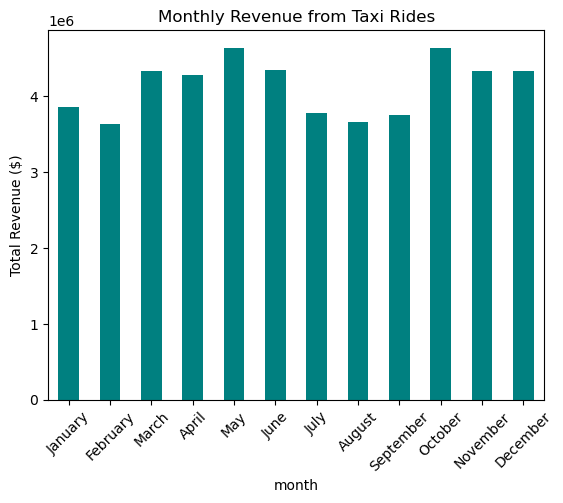

In [118]:
# Group data by month and analyse monthly revenue

df_cleaned["month"] = df_cleaned["tpep_pickup_datetime"].dt.month_name()
monthly_revenue = df_cleaned.groupby("month")["total_amount"].sum().reindex(month_order)
monthly_revenue.plot(kind='bar', color='teal', title='Monthly Revenue from Taxi Rides')
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.show()


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

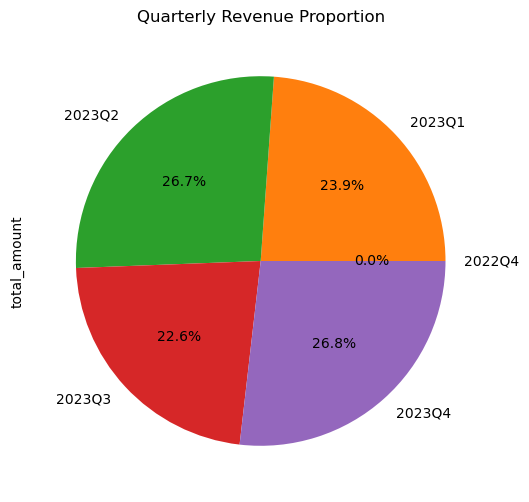

In [121]:
# Calculate proportion of each quarter
df_cleaned["quarter"] = df_cleaned["tpep_pickup_datetime"].dt.to_period("Q").astype(str)

# # Calculate proportion of each quarter
quarterly_revenue = df_cleaned.groupby("quarter")["total_amount"].sum()
quarterly_proportion = quarterly_revenue / quarterly_revenue.sum()
quarterly_proportion.plot(kind='pie', title="Quarterly Revenue Proportion", figsize=(6,6), autopct="%1.1f%%")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

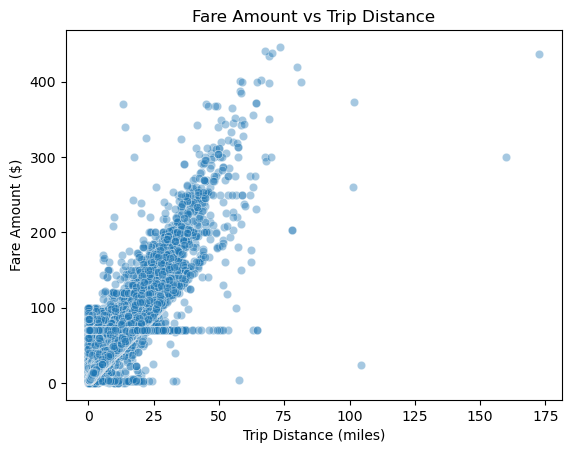

Correlation: 0.9477201049578726


In [124]:
# Show how trip fare is affected by distance

sns.scatterplot(data=df_cleaned, x="trip_distance", y="fare_amount", alpha = 0.4)
plt.title("Fare Amount vs Trip Distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Correlation
print("Correlation:", df_cleaned["trip_distance"].corr(df_cleaned["fare_amount"]))


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

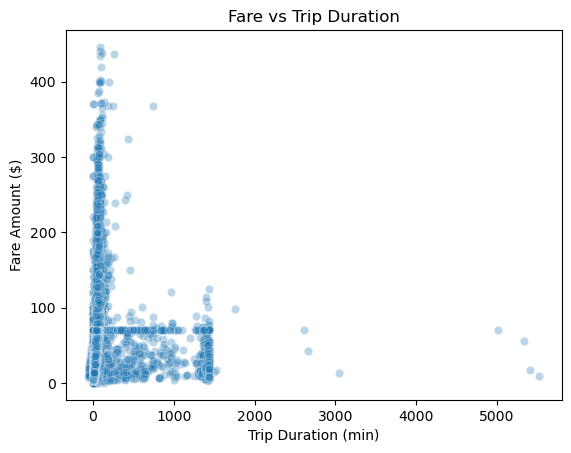

Correlation: 0.2684972718095711


In [127]:
# Show relationship between fare and trip duration

# Trip Duration in minutes
df_cleaned["trip_duration"] = (df_cleaned["tpep_dropoff_datetime"] - df_cleaned["tpep_pickup_datetime"]).dt.total_seconds() / 60

# Show relationship between fare and trip duration
sns.scatterplot(data=df_cleaned, x="trip_duration", y="fare_amount", alpha=0.3)
plt.title("Fare vs Trip Duration")
plt.xlabel("Trip Duration (min)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Correlation
print("Correlation:", df_cleaned["fare_amount"].corr(df_cleaned["trip_duration"]))

In [151]:
# Outliers check for trip_duration and fare amount
#df_cleaned[(df_cleaned['fare_amount']>300)&(df_cleaned['trip_duration']<2)]
#df_cleaned[((df_cleaned['trip_duration']>1000) & (df_cleaned['trip_distance']<5))]
#df_cleaned = df_cleaned[~((df_cleaned['trip_duration']>1000) & (df_cleaned['trip_distance']<5))]


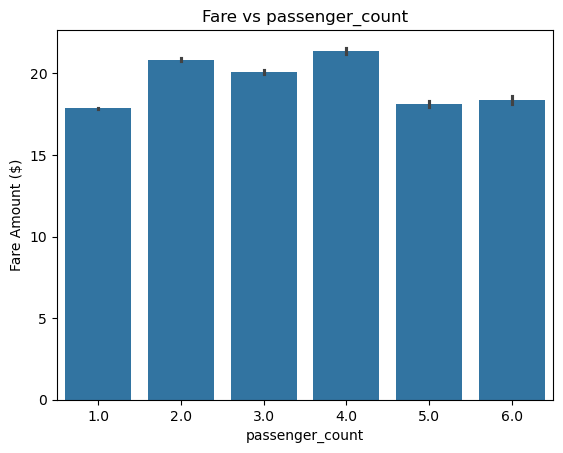

Correlation: 0.044550012399883196


In [129]:
# Show relationship between fare and number of passengers
sns.barplot(data=df_cleaned, x="passenger_count", y="fare_amount")
plt.title("Fare vs passenger_count")
plt.xlabel("passenger_count")
plt.ylabel("Fare Amount ($)")
plt.show()

# Correlation
print("Correlation:", df_cleaned["passenger_count"].corr(df_cleaned["fare_amount"]))

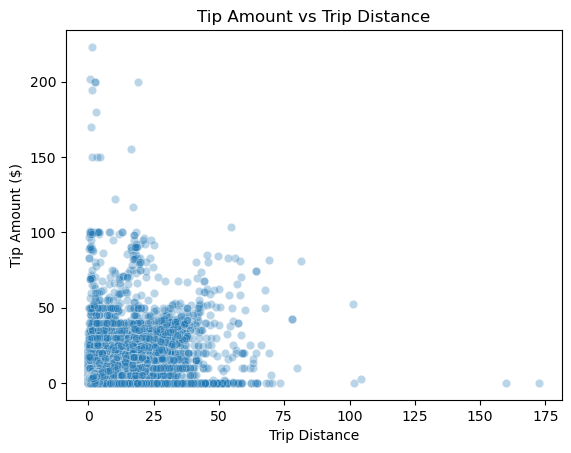

Correlation: 0.5855503944996213


In [131]:
# Show relationship between tip and trip distance

sns.scatterplot(data=df_cleaned, x="trip_distance", y="tip_amount", alpha=0.3)
plt.title("Tip Amount vs Trip Distance")
plt.xlabel("Trip Distance")
plt.ylabel("Tip Amount ($)")
plt.show()

# Correlation
print("Correlation:", df_cleaned["trip_distance"].corr(df_cleaned["tip_amount"]))

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

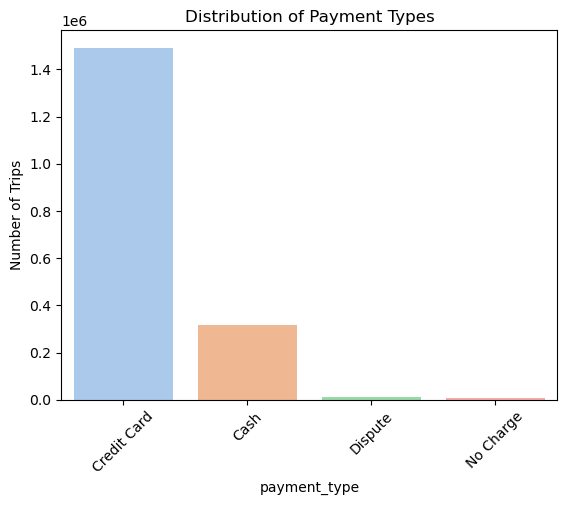

In [134]:
# Analyse the distribution of different payment types (payment_type).

payment_labels = {1: "Credit Card", 2: "Cash", 3: "No Charge", 4: "Dispute"}
df_cleaned["payment_type"] = df_cleaned["payment_type"].map(payment_labels)

sns.countplot(data=df_cleaned, x="payment_type", palette="pastel")
plt.title("Distribution of Payment Types")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [140]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [143]:
os.chdir('..')
os.getcwd()
os.chdir('./taxi_zones')
os.getcwd()

'/Users/riyug/Documents/upgrad-ML-PG-course/Assignments/Datasets and Dictionary/Starter Notebook - EDA NYC Taxi/taxi_zones'

In [145]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

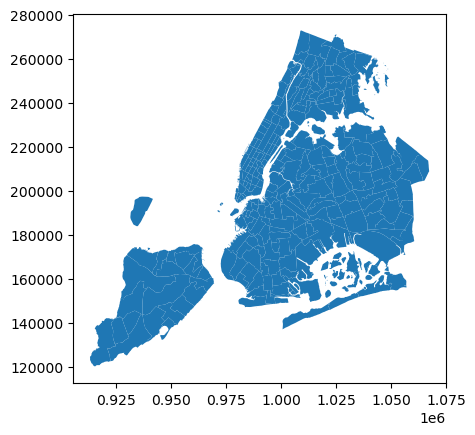

In [148]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [152]:
# Merge zones and trip records using locationID and PULocationID

pu_zones = zones.rename(columns={'LocationID': 'PULocationID'})

pu_zones.head()

df_merged = pd.merge(df_cleaned, pu_zones, on='PULocationID', how='left')


In [153]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827186 entries, 0 to 1827185
Data columns (total 33 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           object        
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                  

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [157]:
# Group data by location and calculate the number of trips

pickup_trips = df_merged.groupby('PULocationID').size().reset_index(name='trip_count')
print("Pickup locations with highest demand:")
print(pickup_trips.sort_values('trip_count', ascending=False).head(10))

dropoff_trips = df_merged.groupby('DOLocationID').size().reset_index(name='trip_count')
print("\nDropoff locations with highest demand:")
print(dropoff_trips.sort_values('trip_count', ascending=False).head(10))

all_locations = pd.concat([df_merged[['PULocationID']].rename(columns={'PULocationID': 'LocationID'}),
    df_merged[['DOLocationID']].rename(columns={'DOLocationID': 'LocationID'})
])

location_totals = all_locations.groupby('LocationID').size().reset_index(name='total_trips')
print("\nOverall busiest locations:")
print(location_totals.sort_values('total_trips', ascending=False).head(10))

Pickup locations with highest demand:
     PULocationID  trip_count
120           132       95428
220           237       90420
148           161       88203
219           236       80620
149           162       67570
172           186       65693
130           142       63136
213           230       61819
157           170       56185
150           163       55127

Dropoff locations with highest demand:
     DOLocationID  trip_count
230           236       83957
231           237       80297
156           161       73283
224           230       56232
165           170       55436
157           162       53277
137           142       53081
233           239       52555
136           141       49826
67             68       47347

Overall busiest locations:
     LocationID  total_trips
232         237       170717
231         236       164577
156         161       161486
157         162       120847
225         230       118051
137         142       116217
127         132       114323
16

In [159]:
location_totals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   LocationID   261 non-null    int64
 1   total_trips  261 non-null    int64
dtypes: int64(2)
memory usage: 4.2 KB


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [162]:
# Merge trip counts back to the zones GeoDataFrame
zone_merged = pd.merge(zones, location_totals, on='LocationID', how='left')
zone_merged.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     263 non-null    int32   
 1   Shape_Leng   263 non-null    float64 
 2   Shape_Area   263 non-null    float64 
 3   zone         263 non-null    object  
 4   LocationID   263 non-null    int32   
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
 7   total_trips  259 non-null    float64 
dtypes: float64(3), geometry(1), int32(2), object(2)
memory usage: 14.5+ KB


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

<Axes: >

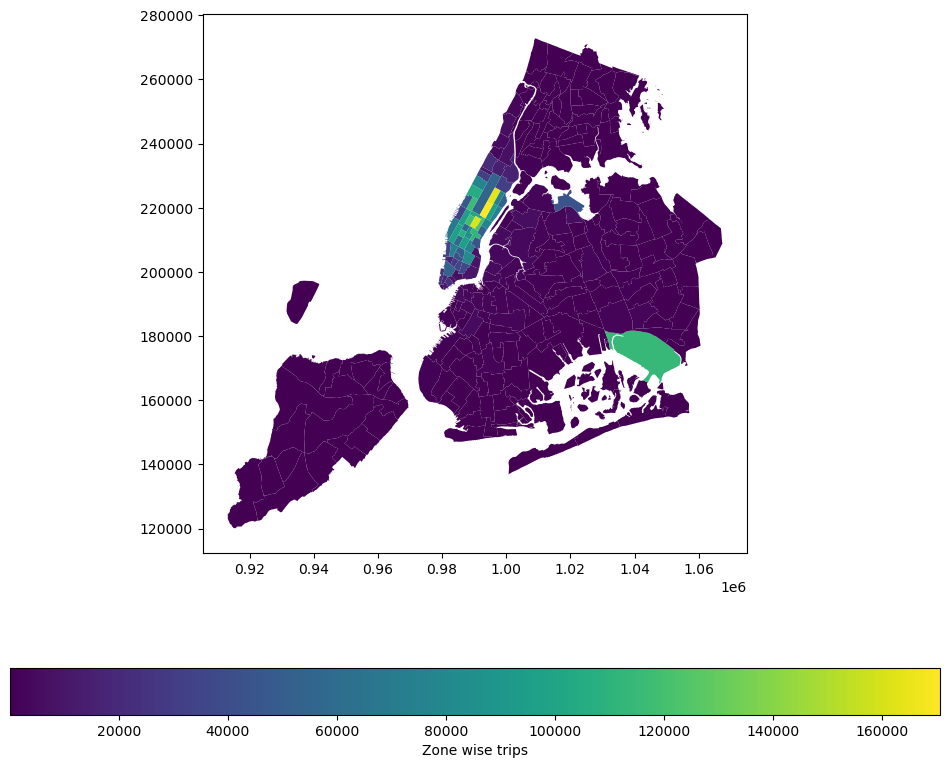

In [167]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zone_merged.plot(column = 'total_trips',
ax = ax,
legend = True,
legend_kwds = {'label': "Zone wise trips", 'orientation': "horizontal"})


In [169]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the GeoDataFrame by total_trips (descending)
zones_sorted = zone_merged.sort_values('total_trips', ascending=False)

# Display top 10 zones with trip counts and borough info
print("Top 10 Busiest Zones:")
display(zones_sorted[['LocationID', 'zone', 'borough', 'total_trips']].head(10))

# Display bottom 10 zones (least busy)
print("\n10 Least Busy Zones:")
display(zones_sorted[['LocationID', 'zone', 'borough', 'total_trips']].tail(10))

Top 10 Busiest Zones:


LocationID                          zone    borough  total_trips
236         237         Upper East Side South  Manhattan     170717.0
235         236         Upper East Side North  Manhattan     164577.0
160         161                Midtown Center  Manhattan     161486.0
161         162                  Midtown East  Manhattan     120847.0
229         230     Times Sq/Theatre District  Manhattan     118051.0
141         142           Lincoln Square East  Manhattan     116217.0
131         132                   JFK Airport     Queens     114323.0
169         170                   Murray Hill  Manhattan     111621.0
185         186  Penn Station/Madison Sq West  Manhattan     106968.0
238         239         Upper West Side South  Manhattan     104713.0


10 Least Busy Zones:


LocationID                                           zone        borough  \
203         204                              Rossville/Woodrow  Staten Island   
43           44                         Charleston/Tottenville  Staten Island   
175         176                                        Oakwood  Staten Island   
198         199                                  Rikers Island          Bronx   
186         187                                  Port Richmond  Staten Island   
98           99                                Freshkills Park  Staten Island   
102         103  Governor's Island/Ellis Island/Liberty Island      Manhattan   
103         103  Governor's Island/Ellis Island/Liberty Island      Manhattan   
104         103  Governor's Island/Ellis Island/Liberty Island      Manhattan   
109         110                               Great Kills Park  Staten Island   

     total_trips  
203          4.0  
43           4.0  
175          3.0  
198          2.0  
186          2.0  
98           1.0  
102          NaN  
103          NaN  
104          NaN  
109          NaN

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [179]:
# Find routes which have the slowest speeds at different times of the day

# 1. Calculate speed
df_merged['speed_mph'] = df_merged['trip_distance'] / (df_merged['trip_duration']/60)

# 2. Find slowest routes by hour (bottom 5%)
slow_routes = df_merged.groupby(['PULocationID', 'DOLocationID', 'hour'])['speed_mph'].median().reset_index().sort_values(['hour', 'speed_mph']).groupby('hour').head(int(len(df_merged)*0.05))

# 3. Merge with zone names
slow_routes = slow_routes.merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID':'PULocationID', 'zone':'PU_zone'}),
    on='PULocationID'
).merge(
    zones[['LocationID', 'zone']].rename(columns={'LocationID':'DOLocationID', 'zone':'DO_zone'}),
    on='DOLocationID'
)
slow_routes = slow_routes[slow_routes['speed_mph']>0]

# 4. Get top 10 worst routes
top10_slowest = slow_routes.sort_values('speed_mph').head(10)[
    ['PU_zone', 'DO_zone', 'hour', 'speed_mph']
].round(2)

print("Top 10 Slowest Routes:")
print(top10_slowest)


Top 10 Slowest Routes:
                        PU_zone                            DO_zone  hour  \
52325   Two Bridges/Seward Park        Downtown Brooklyn/MetroTech    13   
19321       Lincoln Square East                Lincoln Square East     5   
5188                  Woodhaven                          Woodhaven     1   
28370          Garment District                            Astoria     8   
96033           Carroll Gardens        Downtown Brooklyn/MetroTech    21   
101772  Greenwich Village North  University Heights/Morris Heights    22   
68273           Randalls Island                    Randalls Island    16   
37382                 Chinatown                          Chinatown    10   
13469                 Chinatown                       West Village     3   
32704   Greenwich Village North           Washington Heights South     9   

        speed_mph  
52325        0.01  
19321        0.02  
5188         0.03  
28370        0.04  
96033        0.05  
101772       0.05  


In [181]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827186 entries, 0 to 1827185
Data columns (total 34 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           object        
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  date                  

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18:00 with 128932 trips


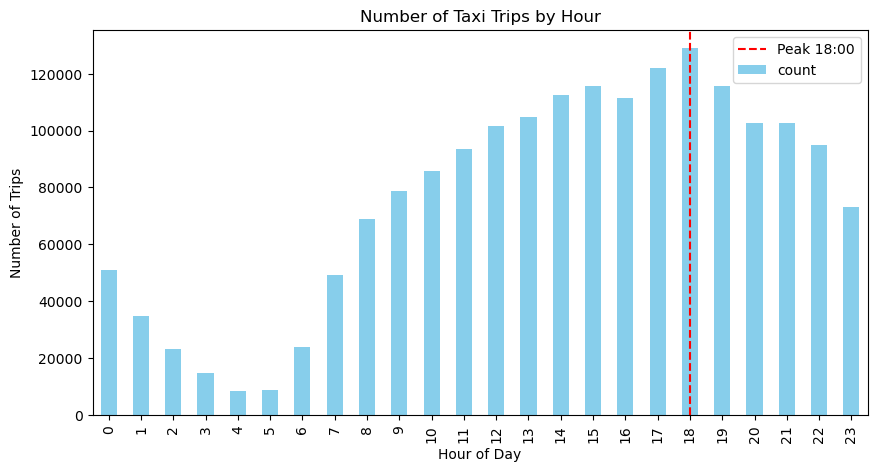

In [183]:
# Visualise the number of trips per hour and find the busiest hour

# 1. Count trips by hour
trips_by_hour = df_merged['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

# 2. Find busiest hour
busiest_hour = trips_by_hour.idxmax()
busiest_count = trips_by_hour.max()

print(f"Busiest hour: {busiest_hour}:00 with {busiest_count} trips")

# 3. Visualize
plt.figure(figsize=(10,5))
trips_by_hour.plot(kind='bar', color='skyblue')
plt.axvline(x=busiest_hour, color='red', linestyle='--', label=f'Peak {busiest_hour}:00')
plt.title('Number of Taxi Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [187]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

# 1. Calculate hourly count for trips in sorted order
sampled_trips = df['tpep_pickup_datetime'].dt.hour.value_counts().sort_values(ascending=False)
actual_trips = (sampled_trips/sample_fraction).astype(int)

top_5_hours = actual_trips.head(5)

print("Actual Estimated Trips in Top 5 Busiest Hours:")
print(top_5_hours.to_string())


Actual Estimated Trips in Top 5 Busiest Hours:
tpep_pickup_datetime
18    4285880
17    4158040
15    3897720
16    3885340
19    3825780


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

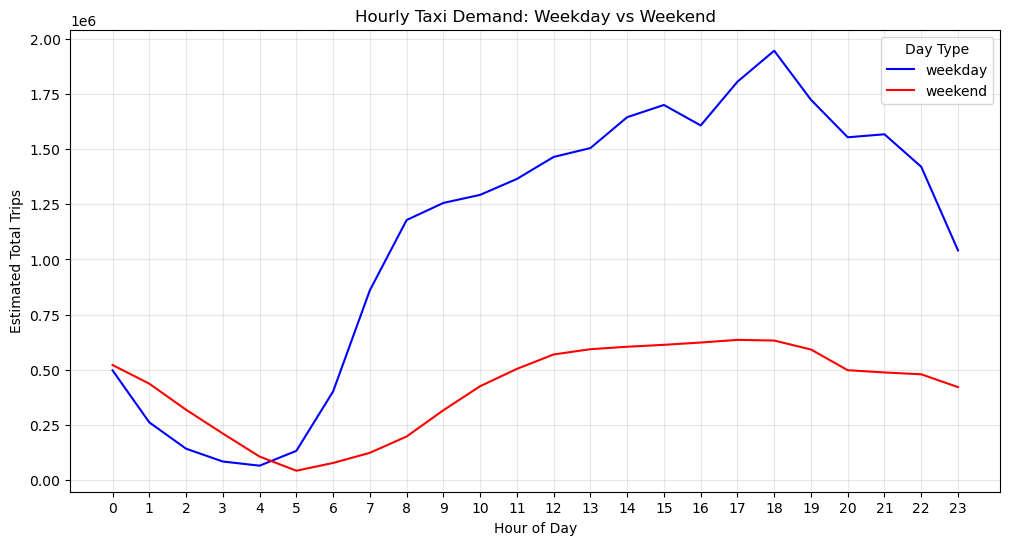

In [190]:
# Compare traffic trends for the week days and weekends

# Extract day type and hour
df_merged['day_type'] = df_merged['tpep_pickup_datetime'].dt.dayofweek.apply(lambda x: 'weekend' if x >= 5 else 'weekday')
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour

# Scale up to estimate actual trips (5% sample)
hourly_trips = df_merged.groupby(['day_type', 'hour']).size() / sample_fraction
hourly_trips = hourly_trips.reset_index(name='trips')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_trips, x='hour', y='trips',hue='day_type',palette={'weekday':'blue', 'weekend':'red'})
plt.title('Hourly Taxi Demand: Weekday vs Weekend')
plt.xlabel('Hour of Day')
plt.ylabel('Estimated Total Trips')
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.legend(title='Day Type')
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [194]:
# Find top 10 pickup and dropoff zones
top_pu_zones = df_merged.groupby(['PULocationID','hour']).size().nlargest(10) / sample_fraction
top_do_zones = df_merged.groupby(['DOLocationID','hour']).size().nlargest(10) / sample_fraction

# Merge with zone names
top_pu_zones = top_pu_zones.reset_index().merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID', right_on='LocationID'
)

top_do_zones = top_do_zones.reset_index().merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID', right_on='LocationID'
)

print("Top 10 hourly Pickup Zones:")
print(top_pu_zones[['zone', 'borough', 'hour']])
print("\nTop 10 hourly Dropoff Zones:")
print(top_do_zones[['zone', 'borough', 'hour']])


Top 10 hourly Pickup Zones:
                    zone    borough  hour
0         Midtown Center  Manhattan    18
1         Midtown Center  Manhattan    17
2  Upper East Side South  Manhattan    18
3  Upper East Side South  Manhattan    14
4  Upper East Side South  Manhattan    15
5  Upper East Side South  Manhattan    17
6            JFK Airport     Queens    22
7  Upper East Side North  Manhattan    15
8         Midtown Center  Manhattan    19
9         Midtown Center  Manhattan    16

Top 10 hourly Dropoff Zones:
                    zone    borough  hour
0  Upper East Side North  Manhattan    14
1  Upper East Side North  Manhattan    15
2  Upper East Side South  Manhattan    18
3  Upper East Side South  Manhattan    12
4  Upper East Side North  Manhattan    18
5  Upper East Side South  Manhattan    15
6  Upper East Side North  Manhattan    17
7  Upper East Side South  Manhattan    14
8  Upper East Side South  Manhattan    17
9  Upper East Side North  Manhattan    16


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [197]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Count pickups and dropoffs per zone (scaled to estimate actual counts)
pu_counts = df_merged['PULocationID'].value_counts() / sample_fraction
do_counts = df_merged['DOLocationID'].value_counts() / sample_fraction

#pu_counts.head()
#do_counts.head()

zone_ratios = pd.DataFrame({
    'pickups': pu_counts,
    'dropoffs': do_counts
}).fillna(0)  # Zones with only pickups or dropoffs

# Calculate ratio (adding small constant for avoiding division by zero)
zone_ratios['pu_do_ratio'] = (zone_ratios['pickups'] + 0.1) / (zone_ratios['dropoffs'] + 0.1)

zone_ratios = zone_ratios.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_index=True,
    right_on='LocationID'
)

top_pu_zones = zone_ratios.nlargest(10, 'pu_do_ratio')[
    ['zone', 'borough', 'pickups', 'dropoffs', 'pu_do_ratio']
]

top_do_zones = zone_ratios.nsmallest(10, 'pu_do_ratio')[
    ['zone', 'borough', 'pickups', 'dropoffs', 'pu_do_ratio']
]

print("Top 10 Pickup-Heavy Zones (High Pickup/Dropoff Ratio):")
display(top_pu_zones)

print("\nTop 10 Dropoff-Heavy Zones (Low Pickup/Dropoff Ratio):")
display(top_do_zones)



Top 10 Pickup-Heavy Zones (High Pickup/Dropoff Ratio):


zone    borough    pickups   dropoffs  \
198                 Rikers Island      Bronx       40.0        0.0   
69                  East Elmhurst     Queens    96320.0    13000.0   
131                   JFK Airport     Queens  1908560.0   377900.0   
137             LaGuardia Airport     Queens   590880.0   281280.0   
185  Penn Station/Madison Sq West  Manhattan  1313860.0   825500.0   
113       Greenwich Village South  Manhattan   503120.0   361400.0   
42                   Central Park  Manhattan   639460.0   461480.0   
248                  West Village  Manhattan   844180.0   629500.0   
161                  Midtown East  Manhattan  1351400.0  1065540.0   
99               Garment District  Manhattan   618840.0   512600.0   

     pu_do_ratio  
198   401.000000  
69      7.409181  
131     5.050436  
137     2.100682  
185     1.591593  
113     1.392142  
42      1.385672  
248     1.341033  
161     1.268277  
99      1.207257


Top 10 Dropoff-Heavy Zones (Low Pickup/Dropoff Ratio):


zone        borough  pickups  dropoffs  \
2                Allerton/Pelham Gardens          Bronx      0.0    1820.0   
26   Breezy Point/Fort Tilden/Riis Beach         Queens      0.0     660.0   
220                            Stapleton  Staten Island      0.0     340.0   
213             South Beach/Dongan Hills  Staten Island      0.0     320.0   
29                         Broad Channel         Queens      0.0     300.0   
244                        West Brighton  Staten Island      0.0     300.0   
155                      Mariners Harbor  Staten Island      0.0     280.0   
108                          Great Kills  Staten Island      0.0     260.0   
4                          Arden Heights  Staten Island      0.0     120.0   
83     Eltingville/Annadale/Prince's Bay  Staten Island      0.0     120.0   

     pu_do_ratio  
2       0.000055  
26      0.000151  
220     0.000294  
213     0.000312  
29      0.000333  
244     0.000333  
155     0.000357  
108     0.000384  
4       0.000833  
83      0.000833

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [200]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Extract hour and filter night trips (11PM-5AM)
night_hours = [23,0,1,2,3,4,5]
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour
night_df = df_merged[df_merged['hour'].isin(night_hours)]

night_pu = night_df['PULocationID'].value_counts().nlargest(10) / sample_fraction
night_do = night_df['DOLocationID'].value_counts().nlargest(10) / sample_fraction

# merge with zones df
night_pu_zones = night_pu.reset_index().merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID', right_on='LocationID'
).rename(columns={'count': 'estimated_trips'})

night_do_zones = night_do.reset_index().merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID', right_on='LocationID'
).rename(columns={'count': 'estimated_trips'})

#Deisplay Results
print(" Top 10 Night Pickup Zones (11PM-5AM)")
display(night_pu_zones[['zone', 'borough', 'estimated_trips']])

print("\n Top 10 Night Dropoff Zones (11PM-5AM)")
display(night_do_zones[['zone', 'borough', 'estimated_trips']])


 Top 10 Night Pickup Zones (11PM-5AM)


zone    borough  estimated_trips
0                  East Village  Manhattan         323840.0
1                   JFK Airport     Queens         295040.0
2                  West Village  Manhattan         260520.0
3                  Clinton East  Manhattan         215660.0
4               Lower East Side  Manhattan         200680.0
5       Greenwich Village South  Manhattan         182540.0
6     Times Sq/Theatre District  Manhattan         163840.0
7  Penn Station/Madison Sq West  Manhattan         142900.0
8                 Midtown South  Manhattan         126420.0
9                  East Chelsea  Manhattan         123220.0


 Top 10 Night Dropoff Zones (11PM-5AM)


zone    borough  estimated_trips
0               East Village  Manhattan         171000.0
1               Clinton East  Manhattan         139960.0
2                Murray Hill  Manhattan         127120.0
3               East Chelsea  Manhattan         118380.0
4                   Gramercy  Manhattan         118360.0
5            Lenox Hill West  Manhattan         107940.0
6               West Village  Manhattan         101400.0
7             Yorkville West  Manhattan         100820.0
8  Times Sq/Theatre District  Manhattan          91620.0
9            Lower East Side  Manhattan          89720.0

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Daytime (6AM-10PM) share :0.881
Nighttime (11PM-5AM)share :0.119


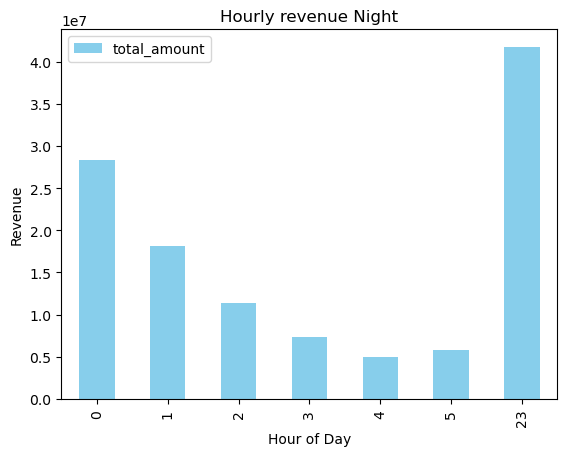

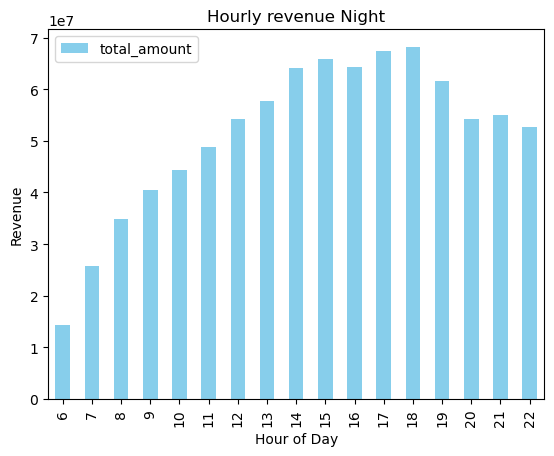

In [203]:
# Filter for night hours (11 PM to 5 AM)
night_hours =  [23,0,1,2,3,4,5]

night_df = df_merged[df_merged['hour'].isin(night_hours)]
day_df = df_merged[~(df_merged['hour'].isin(night_hours))]

day_revenue =  day_df['total_amount'].sum() / sample_fraction
night_revenue = night_df['total_amount'].sum() / sample_fraction
total_revenue = day_revenue + night_revenue

# Calculate shares
print("Daytime (6AM-10PM) share :"+ str((day_revenue / total_revenue).round(3)))
print("Nighttime (11PM-5AM)share :"+ str((night_revenue / total_revenue).round(3)))

hourly_revenue_night = night_df.groupby('hour')['total_amount'].sum() / sample_fraction
hourly_revenue_day = day_df.groupby('hour')['total_amount'].sum() / sample_fraction

hourly_revenue_night.plot(kind='bar', color='skyblue')
plt.title('Hourly revenue Night')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()

hourly_revenue_day.plot(kind='bar', color='skyblue')
plt.title('Hourly revenue Night')
plt.xlabel('Hour of Day')
plt.ylabel('Revenue')
plt.legend()
plt.show()




##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [207]:
# Analyse the fare per mile per passenger for different passenger counts

# Group by passenger count and compute aggrgation
fare_analysis = df_merged.groupby('passenger_count').agg({
    'total_amount': 'mean',
    'trip_distance': 'mean',
    'VendorID': 'count'  
}).rename(columns={'VendorID': 'trip_count'})

# Calculate fare per mile per passenger
fare_analysis['fare_per_mile_per_passenger'] = (
    fare_analysis['total_amount'] / 
    fare_analysis['trip_distance'] / 
    fare_analysis.index  # Passenger count
).round(2)

# Display result
print("Average Fare per Mile per Passenger:")
display(fare_analysis[['trip_count', 'fare_per_mile_per_passenger']])


Average Fare per Mile per Passenger:


trip_count  fare_per_mile_per_passenger
passenger_count                                         
1.0                 1401684                         8.66
2.0                  278084                         3.94
3.0                   68849                         2.71
4.0                   37966                         1.98
5.0                   24360                         1.69
6.0                   16243                         1.41

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

Average Fare per Mile by Hour:


mean
hour       
0     15.98
1     16.17
2     15.43
3     16.59
4     18.65
5     21.63
6     15.23
7     15.24
8     15.53
9     15.63
10    15.60
11    16.18
12    17.20
13    17.54
14    16.86
15    18.08
16    21.84
17    19.56
18    18.70
19    18.71
20    15.13
21    15.01
22    15.44
23    15.56

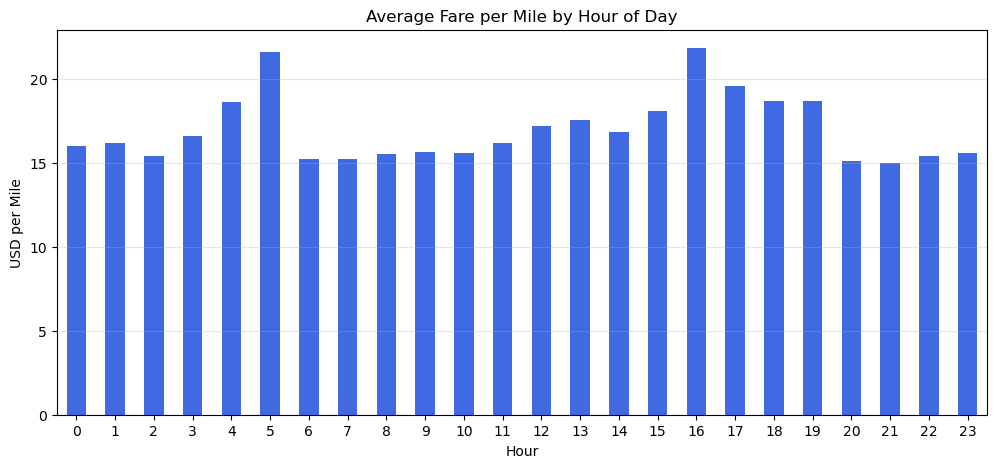


Average Fare per Mile by Day:


mean
day_of_week       
Monday       16.93
Tuesday      17.50
Wednesday    17.30
Thursday     17.32
Friday       16.95
Saturday     15.87
Sunday       18.01

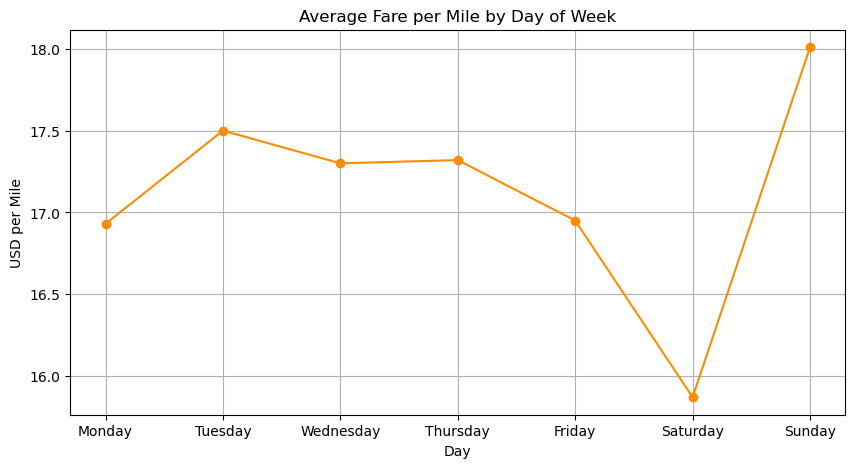

In [210]:
# Compare the average fare per mile for different days and for different times of the day

# Prepare required columns
df_merged['fare_per_mile'] = df_merged['total_amount'] / df_merged['trip_distance']
df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour
df_merged['day_of_week'] = df_merged['tpep_pickup_datetime'].dt.day_name()

# Hourly analysis
hourly_fare = df_merged.groupby('hour')['fare_per_mile'].agg([ 'mean']).round(2)

print("Average Fare per Mile by Hour:")
display(hourly_fare)

# Visualize
plt.figure(figsize=(12,5))
hourly_fare['mean'].plot(kind='bar', color='royalblue')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('USD per Mile')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Daily analysis
daily_fare = df_merged.groupby('day_of_week')['fare_per_mile'].agg(['mean']).round(2)

# Reorder to start with Monday
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_fare = daily_fare.loc[day_order]

print("\nAverage Fare per Mile by Day:")
display(daily_fare)

# Visualize
plt.figure(figsize=(10,5))
daily_fare['mean'].plot(kind='line', marker='o', color='darkorange')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('USD per Mile')
plt.grid()
plt.show()


Average Fare per Mile by Hour:


median
hour        
0       9.66
1       9.59
2       9.49
3       9.29
4       8.52
5       8.88
6       8.90
7      10.15
8      11.24
9      11.55
10     11.67
11     12.03
12     12.10
13     11.96
14     11.89
15     12.00
16     13.15
17     13.28
18     13.13
19     12.49
20     11.16
21     10.68
22     10.34
23      9.92

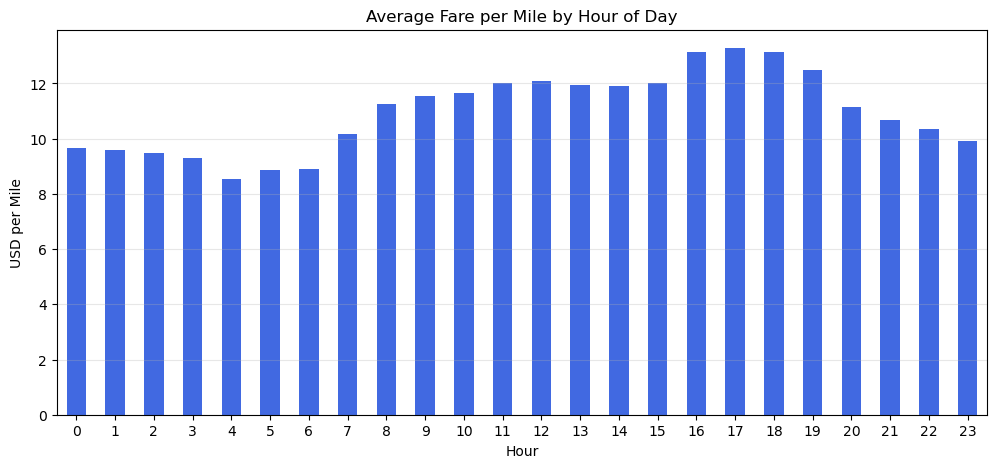


Average Fare per Mile by Day:


median
day_of_week        
Monday        11.35
Tuesday       12.12
Wednesday     12.25
Thursday      12.19
Friday        11.87
Saturday      11.01
Sunday        10.18

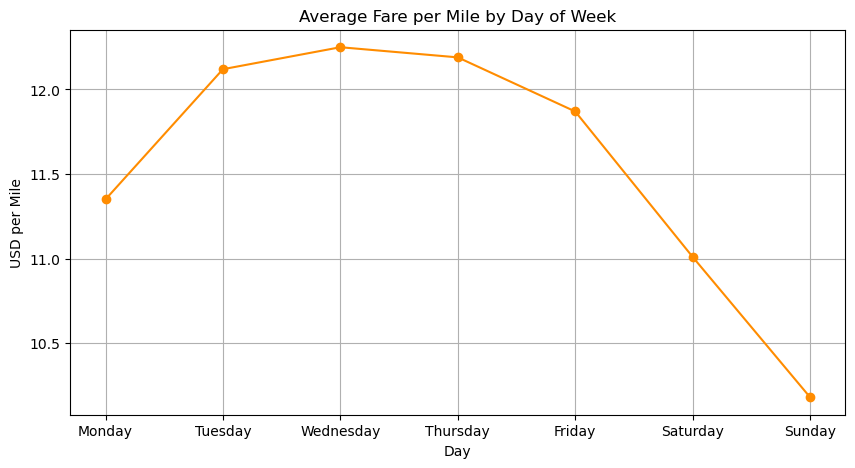

In [212]:
# Hourly analysis
hourly_fare = df_merged.groupby('hour')['fare_per_mile'].agg([ 'median']).round(2)

print("Average Fare per Mile by Hour:")
display(hourly_fare)

# Visualize
plt.figure(figsize=(12,5))
hourly_fare['median'].plot(kind='bar', color='royalblue')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('USD per Mile')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Daily analysis
daily_fare = df_merged.groupby('day_of_week')['fare_per_mile'].agg(['median']).round(2)

# Reorder to start with Monday
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
daily_fare = daily_fare.loc[day_order]

print("\nAverage Fare per Mile by Day:")
display(daily_fare)

# Visualize
plt.figure(figsize=(10,5))
daily_fare['median'].plot(kind='line', marker='o', color='darkorange')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day')
plt.ylabel('USD per Mile')
plt.grid()
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

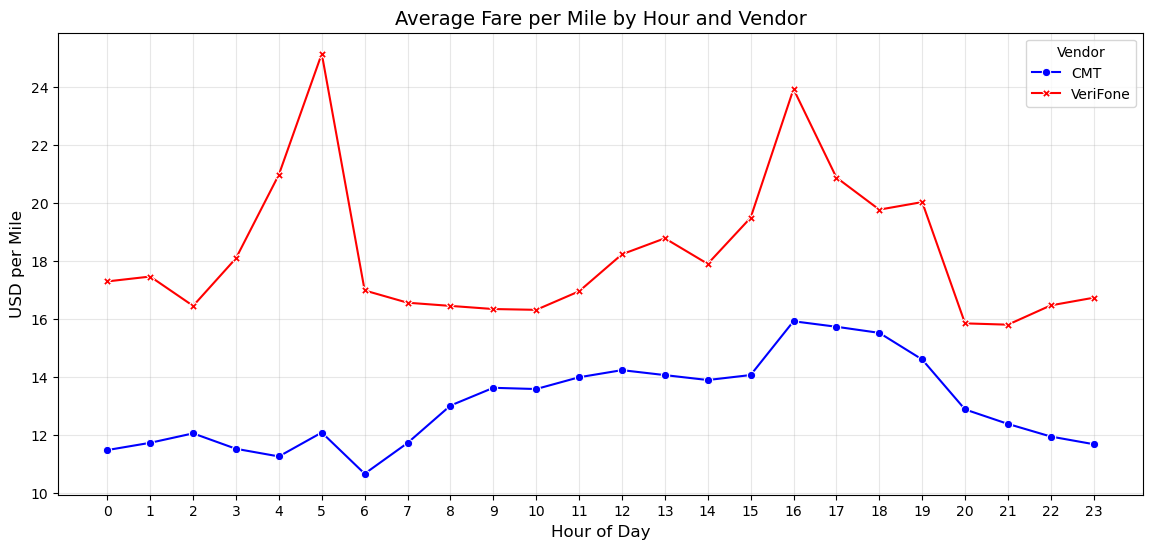

In [215]:
# Compare fare per mile for different vendors
df_merged['vendor_name'] = df_merged['VendorID'].map({1: 'CMT', 2: 'VeriFone'})

# Group by vendor and hour
vendor_hourly = df_merged.groupby(['vendor_name', 'hour'])['fare_per_mile'].agg(
    ['mean', 'median', 'count']
).reset_index()

plt.figure(figsize=(14, 6))

# Line plot comparison
sns.lineplot(
    data=vendor_hourly,
    x='hour',
    y='mean',
    hue='vendor_name',
    style='vendor_name',
    markers=True,
    dashes=False,
    palette={'CMT': 'blue', 'VeriFone': 'red'}
)

plt.title('Average Fare per Mile by Hour and Vendor', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('USD per Mile', fontsize=12)
plt.xticks(range(24))
plt.grid(alpha=0.3)
plt.legend(title='Vendor')
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


Fare per Mile (USD) Comparison:


mean  median
vendor_name distance_tier               
CMT         0-2 miles      17.05   14.70
            2-5 miles       9.21    8.96
            5+ miles        5.83    5.68
VeriFone    0-2 miles      26.12   14.78
            2-5 miles       9.48    9.21
            5+ miles        6.05    5.88

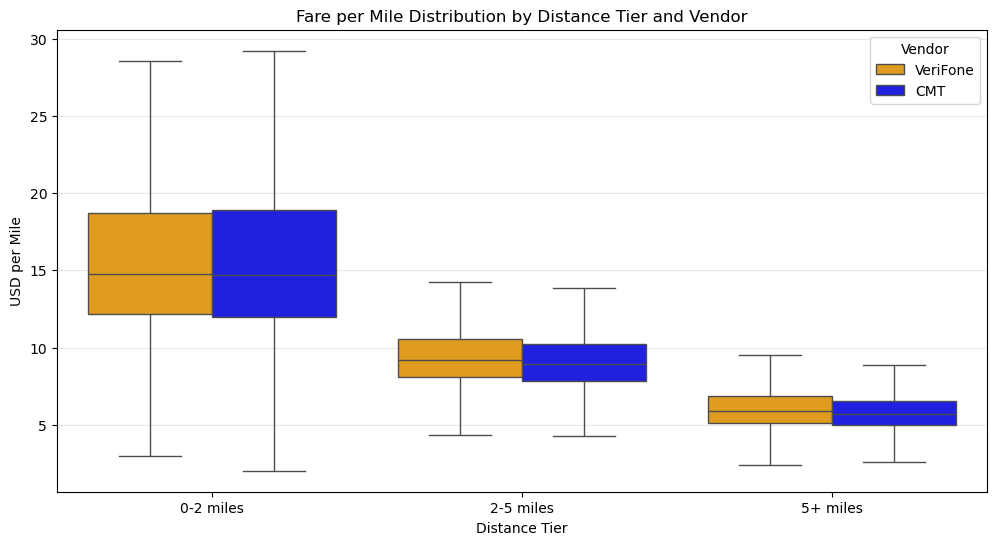

In [218]:
# Defining distance tiers

df_merged['distance_tier'] = pd.cut(df_merged['trip_distance'], bins=[0, 2, 5, np.inf], labels=['0-2 miles', '2-5 miles', '5+ miles'])

tiered_analysis = df_merged.groupby(['vendor_name', 'distance_tier'])['fare_per_mile'].agg(
    ['mean', 'median', 'count']
).round(2)

print("Fare per Mile (USD) Comparison:")
display(tiered_analysis[['mean', 'median']])

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_merged,
    x='distance_tier',
    y='fare_per_mile',
    hue='vendor_name',
    palette={'CMT': 'blue', 'VeriFone': 'orange'},
    showfliers=False  # Remove outliers for clearer visualization
)
plt.title('Fare per Mile Distribution by Distance Tier and Vendor')
plt.xlabel('Distance Tier')
plt.ylabel('USD per Mile')
plt.legend(title='Vendor')
plt.grid(axis='y', alpha=0.3)
plt.show()

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

Tip Percentage Analysis:


mean  median   count
distance_tier passenger_count time_of_day                       
0-2 miles     1.0             Night        0.237   0.288   49347
                              Morning      0.215   0.259  199441
                              Afternoon    0.220   0.262  315944
                              Evening      0.244   0.285  255713
              2.0             Night        0.237   0.288   10788
                              Morning      0.203   0.254   24309
                              Afternoon    0.206   0.256   57130
                              Evening      0.233   0.280   57631
              3.0             Night        0.232   0.288    3156
                              Morning      0.204   0.256    5938
                              Afternoon    0.202   0.254   14806
                              Evening      0.221   0.274   14044
              4.0             Night        0.219   0.283    1718
                              Morning      0.188   0.246    3114
                              Afternoon    0.183   0.240    7652
                              Evening      0.206   0.266    7701
              5.0             Night        0.230   0.288     949
                              Morning      0.211   0.262    3123
                              Afternoon    0.217   0.261    4994
                              Evening      0.241   0.283    4608
              6.0             Night        0.226   0.283     599
                              Morning      0.222   0.259    2493
                              Afternoon    0.214   0.259    3673
                              Evening      0.242   0.287    2480
2-5 miles     1.0             Night        0.190   0.244   35687
                              Morning      0.181   0.232   83921
                              Afternoon    0.183   0.233  127816
                              Evening      0.202   0.246  144409
              2.0             Night        0.194   0.245    7835
                              Morning      0.172   0.231   11633
                              Afternoon    0.175   0.231   26764
                              Evening      0.198   0.244   31840
              3.0             Night        0.187   0.243    1827
                              Morning      0.164   0.228    2943
                              Afternoon    0.169   0.230    7154
                              Evening      0.190   0.242    7454
              4.0             Night        0.191   0.244    1060
                              Morning      0.155   0.222    1682
                              Afternoon    0.154   0.226    3978
                              Evening      0.172   0.235    4021
              5.0             Night        0.191   0.246     805
                              Morning      0.177   0.231    1474
                              Afternoon    0.177   0.231    2205
                              Evening      0.199   0.244    2788
              6.0             Night        0.194   0.251     449
                              Morning      0.183   0.234    1090
                              Afternoon    0.181   0.233    1665
                              Evening      0.207   0.249    1445
5+ miles      1.0             Night        0.147   0.189   19802
                              Morning      0.166   0.214   43203

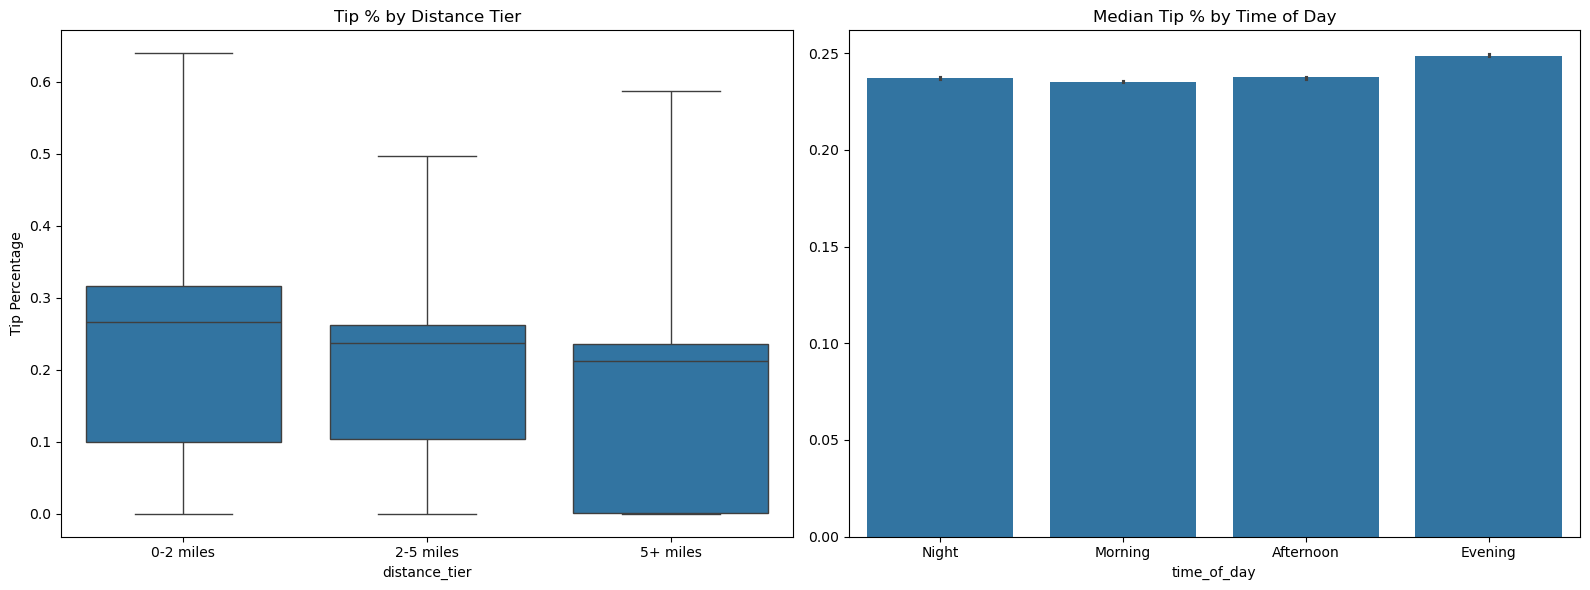

In [228]:
#  Analyze tip percentages based on distances, passenger counts and pickup times


# Calculate tip percentage (tip_amount / fare_amount)
df_merged['tip_pct'] = df_merged['tip_amount'] / df_merged['fare_amount']

df_merged['time_of_day'] = pd.cut(
    df_merged['tpep_pickup_datetime'].dt.hour,
    bins=[0, 6, 12, 18, 24],
    labels=['Night', 'Morning', 'Afternoon', 'Evening'],
    right=False
)

# Group by based on trip distances, passenger counts and time of pickup
tip_analysis = df_merged.groupby(['distance_tier', 'passenger_count', 'time_of_day'])['tip_pct'].agg(
    ['mean', 'median', 'count']
).round(3)

print("Tip Percentage Analysis:")
display(tip_analysis.head(50))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Distance vs Tips
sns.boxplot(data=df_merged, x='distance_tier', y='tip_pct', showfliers=False, ax=ax1)
ax1.set_title('Tip % by Distance Tier')
ax1.set_ylabel('Tip Percentage')

# Time of Day vs Tips
sns.barplot(data=df_merged, x='time_of_day', y='tip_pct', estimator=np.median, ax=ax2)
ax2.set_title('Median Tip % by Time of Day')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

<Axes: xlabel='tip_segment', ylabel='trip_distance'>

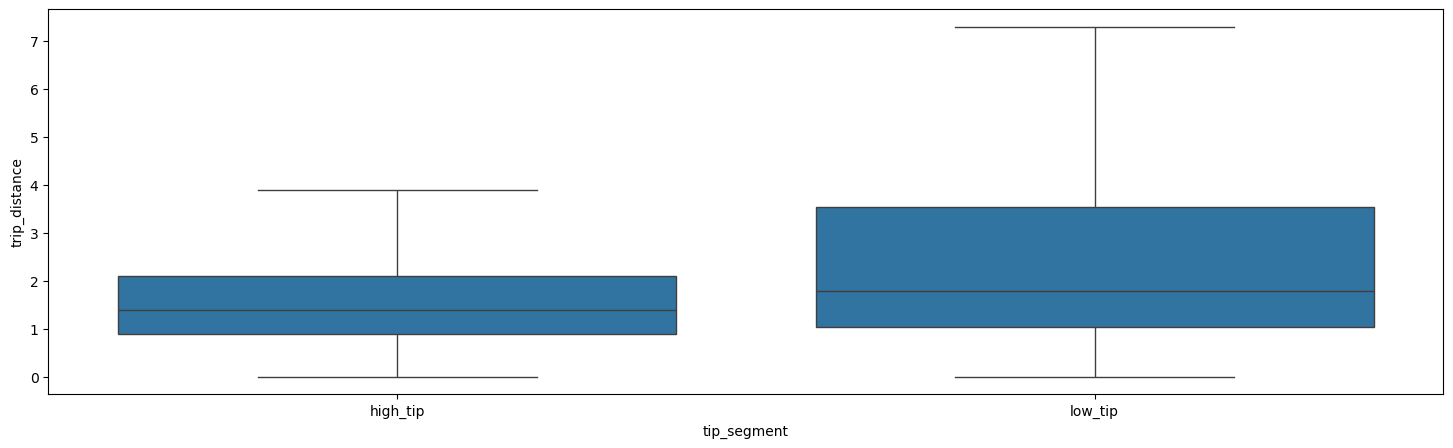

In [224]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# Create tip segments
df_merged['tip_segment'] = np.select(
    [
        df_merged['tip_pct'] < 0.10,
        df_merged['tip_pct'] > 0.25
    ],
    ['low_tip', 'high_tip'],
    default='normal'
)

# Filter valid cases
tip_comparison = df_merged[df_merged['tip_segment'].isin(['low_tip', 'high_tip'])].copy()

fig, axes = plt.subplots(1, 1, figsize=(18,5))

# Trip Distance
sns.boxplot(
    data=tip_comparison,
    x='tip_segment',
    y='trip_distance',
    showfliers=False
)




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

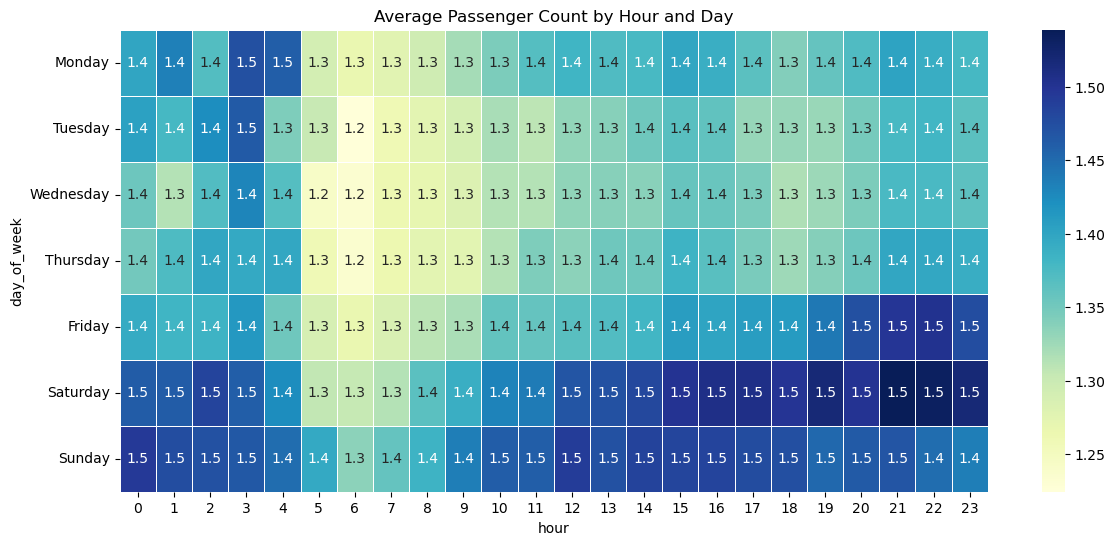

In [229]:
# See how passenger count varies across hours and days

# Pivot table for heatmap
heatmap_data = df_merged.pivot_table(
    index='day_of_week',
    columns='hour',
    values='passenger_count',
    aggfunc='mean'
).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

plt.figure(figsize=(14,6))

sns.heatmap(
    heatmap_data,
    cmap='YlGnBu',
    annot=True,
    fmt='.1f',
    linewidths=0.5
)

plt.title('Average Passenger Count by Hour and Day')
plt.show()


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [232]:
# How does passenger count vary across zones

# 1. Group by with simplified column names
zone_passengers = df_merged.groupby('PULocationID').agg(
    mean_passengers=('passenger_count', 'mean'),
).round(2).reset_index()

# 2. Merge with zone info
zone_passengers = zone_passengers.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID'
)

# 3. Sort and display
zone_passengers = zone_passengers.sort_values('mean_passengers', ascending=False)
print("Top 10 Zones by Passenger Volume:")
display(zone_passengers.head(10))
display(zone_passengers['mean_passengers'].value_counts())

Top 10 Zones by Passenger Volume:


PULocationID  mean_passengers  LocationID                     zone  \
164           178             6.00         178      Ocean Parkway South   
169           183             2.50         183               Pelham Bay   
137           149             2.20         149                  Madison   
230           248             2.00         248   West Farms/Bronx River   
3               6             2.00           6  Arrochar/Fort Wadsworth   
53             58             2.00          58             Country Club   
186           201             2.00         201            Rockaway Park   
180           195             1.89         195                 Red Hook   
30             35             1.86          35              Brownsville   
17             20             1.83          20                  Belmont   

           borough  
164       Brooklyn  
169          Bronx  
137       Brooklyn  
230          Bronx  
3    Staten Island  
53           Bronx  
186         Queens  
180       Brooklyn  
30        Brooklyn  
17           Bronx

mean_passengers
1.00    27
1.50    17
1.33    16
1.34    12
1.40    10
        ..
2.50     1
1.67     1
1.28     1
1.89     1
6.00     1
Name: count, Length: 61, dtype: int64

<Axes: >

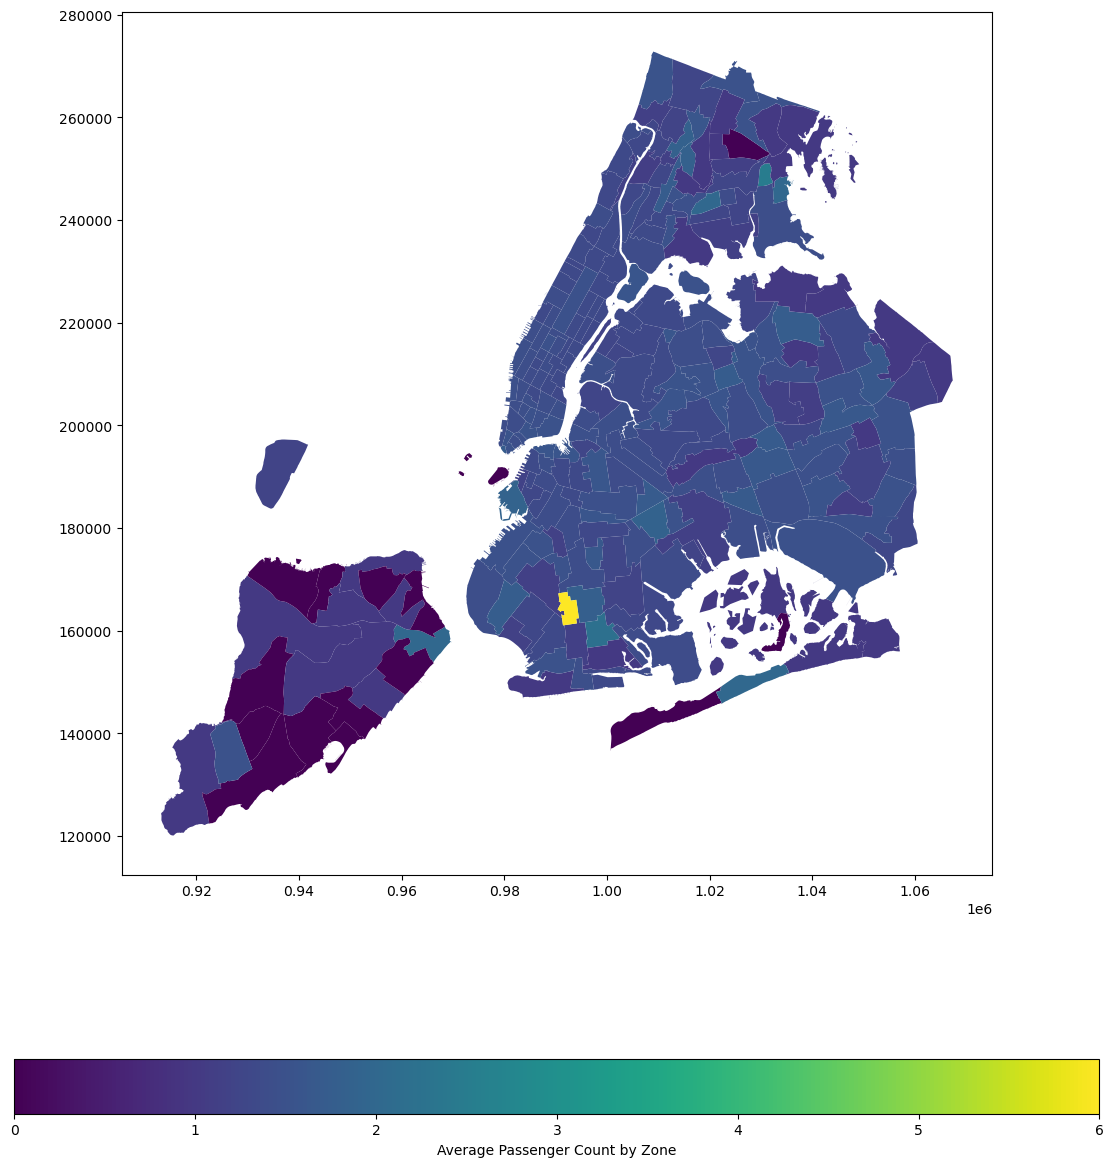

In [678]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

# Calculate average passengers per zone and merge with zones df
avg_passengers = df_merged.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passengers.columns = ['LocationID', 'avg_passenger_count']

zones_with_trips = zones.merge(
    avg_passengers,
    on='LocationID',
    how='left'
).fillna(0)

# 3. Create plot using gpg
fig, ax = plt.subplots(1, 1, figsize=(14, 16))
zones_with_trips.plot(column = 'avg_passenger_count',
ax = ax,
legend = True,
legend_kwds = {'label': "Average Passenger Count by Zone", 'orientation': "horizontal"})

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

<Figure size 1200x600 with 0 Axes>

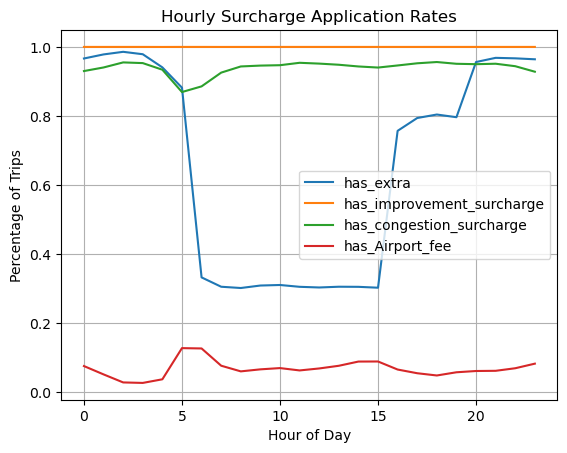

Top 5 Zones for each Surcharge Type:


zone borough  has_extra
31         Bronxdale   Bronx        1.0
45       City Island   Bronx        1.0
58      Crotona Park   Bronx        1.0
116  Hammels/Arverne  Queens        1.0
121           Hollis  Queens        1.0

zone        borough  has_improvement_surcharge
0           Newark Airport            EWR                        1.0
1              Jamaica Bay         Queens                        1.0
3            Alphabet City      Manhattan                        1.0
5  Arrochar/Fort Wadsworth  Staten Island                        1.0
6                  Astoria         Queens                        1.0

zone        borough  has_congestion_surcharge
1                       Jamaica Bay         Queens                  1.000000
45                      City Island          Bronx                  1.000000
58                     Crotona Park          Bronx                  1.000000
205       Saint George/New Brighton  Staten Island                  1.000000
223  Stuy Town/Peter Cooper Village      Manhattan                  0.999546

zone   borough  has_Airport_fee
137  LaGuardia Airport    Queens         0.968725
131        JFK Airport    Queens         0.936182
69       East Elmhurst    Queens         0.504776
15             Bayside    Queens         0.333333
21    Bensonhurst West  Brooklyn         0.285714

In [234]:
# How often is each surcharge applied?

# Flag for indicating which trips have each surcharge type
surcharge_types = ['extra', 'improvement_surcharge', 'congestion_surcharge', 'Airport_fee']
for charge in surcharge_types:
    df_merged[f'has_{charge}'] = df_merged[charge] > 0

df_merged['hour'] = df_merged['tpep_pickup_datetime'].dt.hour
df_merged['day_type'] = df_merged['tpep_pickup_datetime'].dt.dayofweek.apply(
    lambda x: 'weekend' if x >= 5 else 'weekday'
)

# Hourly surcharge frequency
hourly_surcharges = df_merged.groupby('hour')[['has_'+c for c in surcharge_types]].mean()

# Plot hourly patterns
plt.figure(figsize=(12,6))
hourly_surcharges.plot()
plt.title('Hourly Surcharge Application Rates')
plt.ylabel('Percentage of Trips')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.show()

# Merge with zone data
zone_surcharges = df_merged.groupby('PULocationID')[['has_'+c for c in surcharge_types]].mean()

zone_surcharges = zone_surcharges.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_index=True,
    right_on='LocationID'
)

# Top zones for each surcharge
print("Top 5 Zones for each Surcharge Type:")
for charge in surcharge_types:
    display(zone_surcharges.nlargest(5, f'has_{charge}')[['zone', 'borough', f'has_{charge}']])

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

##  Routing and Dispatching Optimization Recommendations:
### Prioritize 5 AM–6 PM Window:
Since pickups spike sharply after 5 AM and peak at 6 PM, more taxis should be actively dispatched during these hours, particularly between 11 AM–7 PM.

### Focus on Thursday Surge:
Thursday consistently shows higher pickup volumes. On Thursdays, increase fleet availability, especially in Manhattan, to meet this higher demand.

### Mitigate Slow Routes:
Identify and avoid dispatching on slow routes like Two Bridges/Seward Park -> Downtown Brooklyn during peak congestion hours (e.g., 1 PM).
Suggest alternative quicker routes or use dynamic route optimization tools like google maps which can guide cab drivers with optimal route (e.g., based on real-time traffic feeds).

### Shift Strategy Based on Day vs Night Trends:
Daytime (6 AM–10 PM): 88% revenue contribution -> Focus on efficient routing and more coverage.
Nighttime (11 PM–5 AM): Only 12% of revenue -> Optimize to avoid wastage; fewer cabs needed except around East Village, JFK, Times Square hotspots at night.

### Predictive Scheduling:
Use ML-based prediction models to forecast next-hour demands based on current pickups, weather, holidays, and special events.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

##   Strategic Cab Positioning Recommendations:
###  Heavy Pickup Zones:
Place more cabs around:
1. Midtown Center (Manhattan)
2. Upper East Side South/North (Manhattan)
3. JFK Airport (Queens)
4. Penn Station/Madison Square West (Manhattan)
###  Nighttime Pickup Zones:
For late-night hours (11 PM–5 AM), focus deployments in:
1. East Village
2. JFK Airport
3. Times Square/Theatre District
4. Greenwich Village South
5. West Village
###  Airport Focused Strategy:
JFK and LaGuardia have a high pickup/drop-off volume, especially at night.
Position idle cabs at arrival terminals around late evenings (8 PM–12 AM).

###  Low Efficiency Zones:
Avoid over-deploying to low pickup zones like Staten Island or areas like Breezy Point, South Beach, etc., which showed almost no pickups.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

##      Pricing Strategy Adjustments:
###   Surge Pricing at 5 AM and 4–6 PM:
Based on fare-per-mile analysis, trips during 5 AM and 4 PM–6 PM are naturally priced higher.
Introduce mild surge multipliers during these hours to capitalize on peak demand.

###   Weekend Discount Strategy:
As Sunday shows highest fares and lowest volumes (especially low tip percentages), apply discounts or promos to boost weekend usage.

###   Vendor Pricing Alignment:
CMT charges significantly less than Verifone, especially for longer trips (5+ miles)
Standardize or optimize short distance (0–2 miles) pricing to match Verifone's advantage without losing customers on long rides.
###   Distance-Based Tiering:
Shorter trips are significantly expensive per mile. Consider:
A flat fee for ultra-short rides (<2 miles).
Mileage discounts after 5 miles to make longer trips look more attractive.
		
###   Optimize Night Surcharges:
Nighttime fares (11 PM–5 AM) are already 12% of revenue.
Keep night surcharges lower compared to competitors to encourage higher trip counts and market share in night economy.

###   Incentivize Tip-Boosting Time Slots:
As evening rides (~6 PM–11 PM) show higher tip percentages, offer tip-matching promotions.